
### Mt San Antonio College <br>



#### CISD41 Introduction to Data Science by Sohair Zaki<br>
#### US Real Estate Market and Economics<br>
#### by Jack Chen and Alec Phong<br>


### Overview


<ol>
<li>Purpose & Questions</li>
<li>Importing Data</li>
<ul><li>Importing Libraries, Loading Data, Reading Data</li></ul>
<ul><li>Functions, Lambda, and Cleaning</li></ul>
<ul><li>Organizing Sub-Datasets</li></ul>
<ul><li>Merge Sub-Datasets and create House_df</li></ul>
<li>Data Visualization</li>
<ul><li>Pivot Tables and Groupby Table</li></ul>
<ul><li>Additional Cleaning and Organizing to create State_df</li></ul>
<ul><li>House_df</li></ul>
<ul><ul><li>Quantitative Data Exploratory(Correlation, Coefficients, P-values)</li></ul></ul>
<ul><ul><li>Visualization</li></ul></ul>
<ul><li>State_df</li></ul>
<ul><ul><li>Quantitative Data Exploratory(Correlation, Coefficients, P-values)</li></ul></ul>
<ul><ul><li>Visualization</li></ul></ul>

<li>Testing Hypothesis, ANOVA</li>
<ul><li>Chisquare, ANOVA, Normal-test, Z-test, Pearson Correlation</li></ul>
<li>Conclusion</li>
<li>References</li>
</ol>

### 1. Purpose & Questions

<b> Purpose </b><br>
<br>Real Estate is a huge investment throughout individual's life. This will enhance individual's knowledge of United States real estate market and related economic information.

<b> Questions</b>
<ol>
<li>What is average and median house price across all USA</li>
<li>Is Size highly correlated with Price? If not what’s most correlated with Price.</li>
<li>What's the primary type of houses people prefer in each state? (Graph answer, house_df graph)</li>
<li>What states have the largest and smallest avg size? </li>
<li>What states have the highest and lowest $ perSqFt?</li>
<li>Find out the SavingsRate for each state.</li>
<li>Save how many years to buy a house with 20% down payment per state</li>
</ol>

### 2. Cleaning Data

#### Importing Libraries, Loading Data, Reading Data

In [1]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
import scipy.stats as st
%matplotlib inline

# filter warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Display plotly plots offline in notebook mode
init_notebook_mode(connected=True)

In [2]:
# Loading Data              # FOR YEAR 2020

# "main" data for housing
df = pd.read_csv('data/data_house.csv')                     

# subdata sets
spending_df = pd.read_csv('data/data_spending.csv')         # need 1 column of spending per state
gdp_df = pd.read_csv('data/data_gdp.csv')                   # need 1 column of gdp per state
population_df = pd.read_csv('data/data_population.csv')     # need 1 column of population per state
income_df = pd.read_csv('data/data_income.csv')             # need 1 column of income per state


In [3]:
# Read the shape of df
df.shape

(85509, 8)

In [4]:
# Reading the housing data
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85509 entries, 0 to 85508
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        85509 non-null  object 
 1   Address      85509 non-null  object 
 2   Bedrooms     64999 non-null  object 
 3   Bathrooms    69439 non-null  object 
 4   Size         73698 non-null  object 
 5   Sale Status  69960 non-null  object 
 6   URL          85509 non-null  object 
 7   Raw Price    85509 non-null  float64
dtypes: float64(1), object(7)
memory usage: 5.2+ MB


Price                                       Address Bedrooms  \
85504   $79,000,000                 2 Park Pl, New York, NY 10007      NaN   
85505   $90,000,000          432 Park Ave #82, New York, NY 10022    6 bds   
85506   $95,000,000         1441 Angelo Dr, Los Angeles, CA 90210      NaN   
85507   $99,000,000         908 Bel Air Rd, Los Angeles, CA 90077    9 bds   
85508  $110,000,000  30 Beverly Park Ter, Beverly Hills, CA 90210    8 bds   

      Bathrooms         Size          Sale Status  \
85504      1 ba   9,680 sqft       Condo for sale   
85505      8 ba   8,054 sqft       Condo for sale   
85506       NaN          NaN  Lot / Land for sale   
85507     20 ba  34,000 sqft       House for sale   
85508     12 ba      -- sqft       House for sale   

                                                     URL    Raw Price  
85504  https://www.zillow.com/homedetails/2-Park-Pl-N...   79000000.0  
85505  https://www.zillow.com/homedetails/432-Park-Av...   90000000.0  
85506  https://www.zillow.com/homedetails/1441-Angelo...   95000000.0  
85507  https://www.zillow.com/homedetails/908-Bel-Air...   99000000.0  
85508  https://www.zillow.com/homedetails/30-Beverly-...  110000000.0

In [5]:
# read df head
df.head()

Price                                        Address Bedrooms Bathrooms  \
0    $1                  Airpark N, Loveland, CO 80538      NaN       NaN   
1    $1        2940 W Sunset Ave, Springdale, AR 72762      NaN       NaN   
2    $1  2392 SE Fruit Ave, Port Saint Lucie, FL 34952    3 bds      2 ba   
3    $1           0 SW 38th Ter, Gainesville, FL 32605      NaN       NaN   
4    $1                75th St NW, Rochester, MN 55901      NaN       NaN   

         Size          Sale Status  \
0         NaN  Lot / Land for sale   
1         NaN  Lot / Land for sale   
2  1,649 sqft                  NaN   
3         NaN  Lot / Land for sale   
4         NaN                  NaN   

                                                 URL  Raw Price  
0  https://www.zillow.com/homedetails/Airpark-N-L...        1.0  
1  https://www.zillow.com/homedetails/2940-W-Suns...        1.0  
2  https://www.zillow.com/homedetails/2392-SE-Fru...        1.0  
3  https://www.zillow.com/homedetails/0-SW-38th-T...        1.0  
4  https://www.zillow.com/homedetails/75th-St-NW-...        1.0

#### Functions, Lambda, and Cleaning

In [6]:
# Function #1
# drop NaN, Price, URL, and assign to df1
def metric_deletion(x):
    x.dropna(axis='rows',inplace=True)                  # drop NA
    x = x[x.Bedrooms != '-- bds']                       # drop -- bds
    x = x[x.Bathrooms != '-- ba']                       # drop -- ba
    x = x[x.Size != '-- sqft']                          # drop -- sqft
    x.drop(['URL', 'Price'], axis=1,inplace=True)       # drop URL and Price column since we dont need them, there is raw price in float
    return x
df1 = metric_deletion(df)                               # applying the function to the df and assign df1
df1.head()

Address Bedrooms Bathrooms  \
5        3515 W Thompson Rd, Indianapolis, IN 46217    2 bds      1 ba   
53        3713 Hillside Ave, Indianapolis, IN 46218    2 bds      1 ba   
65  1337 W Livingston St APT 1, Allentown, PA 18102    3 bds      1 ba   
70                 1788 Westwood Dr, Troy, MI 48083    3 bds      2 ba   
72       390 Rosado Springs St, Henderson, NV 89014    2 bds      2 ba   

          Size         Sale Status  Raw Price  
5     814 sqft      House for sale        1.0  
53  1,728 sqft      House for sale      775.0  
65  1,000 sqft      House for sale     1050.0  
70  1,418 sqft      House for sale     1600.0  
72  1,060 sqft  Townhouse for sale     1700.0

In [7]:
# Converting Bathrooms into float
df1.Bathrooms = df1.Bathrooms.str.replace(' ba','').astype('float')     # remove the " ba" and assign the remaining number to float
# Converting Bedrooms into float
df1.Bedrooms = df1.Bedrooms.str.replace(' bds','').astype('float')      # remove the " bds" and assign the remaining number to float

In [8]:
# Function #2
# Converting Size to float
def filt_size(s):
    s= s.replace(',','')                # remove the , in size
    s =s.replace(' sqft','')            # remove the " sqft" in size
    return float(s)                     # convert it to float
df1.Size = df1.Size.apply(filt_size)    # applying the function

In [9]:
# Spliting Address into Street, City, State, ZipCode, and drop the Address
df1.Address = df1.Address.astype('str')                                             # convert Address to string
df1['Street']= df1.Address.apply(lambda x: x.split(', ')[0])                        # splitting address into list and assign each value to the corresponding columns
df1['City']= df1.Address.apply(lambda x: x.split(', ')[1])                          # splitting address into list and assign each value to the corresponding columns
df1['State']= df1.Address.apply(lambda x: (x.split(', ')[-1]).split(' ')[0])        # splitting address into list and assign each value to the corresponding columns
df1['ZipCode']= df1.Address.apply(lambda x: (x.split(', ')[-1]).split(' ')[1])      # splitting address into list and assign each value to the corresponding columns
# Assign to df2
df2 = df1.drop(['Address'],axis=1)                                                  # since we have the columns, we dont need address anymore
# Reset the index
df2.reset_index(inplace=True,drop=True)                                             # resetting index, and drop original index
df2.head()


Bedrooms  Bathrooms    Size         Sale Status  Raw Price  \
0       2.0        1.0   814.0      House for sale        1.0   
1       2.0        1.0  1728.0      House for sale      775.0   
2       3.0        1.0  1000.0      House for sale     1050.0   
3       3.0        2.0  1418.0      House for sale     1600.0   
4       2.0        2.0  1060.0  Townhouse for sale     1700.0   

                       Street          City State ZipCode  
0          3515 W Thompson Rd  Indianapolis    IN   46217  
1           3713 Hillside Ave  Indianapolis    IN   46218  
2  1337 W Livingston St APT 1     Allentown    PA   18102  
3            1788 Westwood Dr          Troy    MI   48083  
4       390 Rosado Springs St     Henderson    NV   89014

In [10]:
# Found two rows of abnormal values, so found exact address on google and replace with the right values
df2.loc[28709:28711, 'State']= 'AZ'                 # the two rows are missing state and zip, after googling found exact address
df2.loc[28709:28711, 'ZipCode']= '85260'            # df2.loc[ (index values) , column names] = assigned value


In [11]:
# Converting the columns as strings for further cleaning
df2[['Street','City','State','ZipCode']].astype('str')          # since they are object type, convert them to string

Street          City State ZipCode
0              3515 W Thompson Rd  Indianapolis    IN   46217
1               3713 Hillside Ave  Indianapolis    IN   46218
2      1337 W Livingston St APT 1     Allentown    PA   18102
3                1788 Westwood Dr          Troy    MI   48083
4           390 Rosado Springs St     Henderson    NV   89014
...                           ...           ...   ...     ...
45394  111 W 57th St PENTHOUSE 72      New York    NY   10019
45395              0 Del Valle Rd     Livermore    CA   94550
45396           1060 Brooklawn Dr   Los Angeles    CA   90077
45397            432 Park Ave #82      New York    NY   10022
45398              908 Bel Air Rd   Los Angeles    CA   90077

[45399 rows x 4 columns]

In [12]:
# Finding the weird ZipCode, it is in Canada
df2.loc[df2.ZipCode == 'N9V']   

Bedrooms  Bathrooms    Size     Sale Status  Raw Price         Street  \
38379       4.0        4.0  2800.0  House for sale   865000.0  349 Benson Ct   

              City State ZipCode  
38379  Amherstburg    ON     N9V

In [13]:
# Dropping the canada row
df2.drop(df2.iloc[38379].name,inplace=True)

In [14]:
# Now the ZipCode can be converted to Integer
df2.ZipCode = df2.ZipCode.astype('int')


In [15]:
# convert Sale Status into house Types 
# first we make a list
house_status = list(df2['Sale Status'].unique())
house_status

['House for sale',
 'Townhouse for sale',
 'Multifamily home for sale',
 'Condo for sale',
 'Home for sale',
 'Apartment for sale']

In [16]:
# Make a list of house types
house_type = ['House','Townhouse','Multifamily', 'Condo', 'Others', 'Apartment']

# Replacing house_status with house_type using .map
df2['Sale Status'] = df2['Sale Status'].map(dict(zip(house_status,house_type)))

# Rename column sale status to type
df2.rename(columns={"Sale Status": "Type"}, inplace=True)


In [17]:
# Street column is not useful so we drop it and assign new df3
df3 = df2.drop(['Street'], axis=1)
df3.head()

Bedrooms  Bathrooms    Size       Type  Raw Price          City State  \
0       2.0        1.0   814.0      House        1.0  Indianapolis    IN   
1       2.0        1.0  1728.0      House      775.0  Indianapolis    IN   
2       3.0        1.0  1000.0      House     1050.0     Allentown    PA   
3       3.0        2.0  1418.0      House     1600.0          Troy    MI   
4       2.0        2.0  1060.0  Townhouse     1700.0     Henderson    NV   

   ZipCode  
0    46217  
1    46218  
2    18102  
3    48083  
4    89014

In [18]:
# Change Raw Price column name to Price
df3.rename(columns={"Raw Price":"Price"}, inplace=True)

# Column - create perSqft column
df3['perSqFt'] = df3.Price / df3.Size

In [19]:
# Visualize the last value counts per state
df3.State.value_counts().tail(5)

# HI NH is below 30 counts, so dropping HI and NH
df3 = df3[(df3['State'] != 'HI') & (df3['State'] != 'NH')]

# drop Type: Others
# because it is not the majority and has weird type of lots/houses/other asset types
df3 = df3[df3['Type'] != 'Others']

In [20]:
# Due to previously dropping rows, reset index again
# West Virginia and Wyoming not in data
df3 = df3.reset_index(drop=True)

# Check how many states we have 
len(df3.State.unique())


46

In [21]:
# Function #3 find_region()
# Assign Regions, also need to drop Wyoming and West Virgina since the dataset does not contain them
# listings for that certain State in the initial DataFrame 
#               this is created manually
west = ['CA', 'NV', 'AK', 'WA' , 'OR', 'ID', 'MT', 'UT', 'CO', 'AZ', 'NM']
midwest = ['ND', 'WI','SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'IL', 'IN', 'OH','MI']
north = ['PA', 'NY', 'MA', 'CT', 'ME', 'DC', 'NJ', 'RI']
south = ['TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'VA', 'MD', 'DE', 'NC', 'SC', 'GA', 'FL']

# List - full state list other than the df
full_state_list = west + midwest + north + south

# Creating function to assign regions
def find_region(state):
    if state in west:
        state = 'West'
    elif state in north:
        state = 'North'
    elif state in south:
        state = 'South'
    elif state in midwest:
        state = 'MidWest'
    return state

# Create Region column by using find_region function
df3['Region'] = df3.State.apply(find_region)

In [22]:
# Sort the full state list
full_state_list.sort()
full_state_list

# List - states from df
comparator = df3['State'].unique().tolist()
comparator.sort()
comparator

# compare full_state_list and our df-state-list,
compare_dict = dict(zip(full_state_list,comparator))
compare_dict

# Check our list of states and dataframe states are in sync
# df3 is fully cleaned, now we are making a "state_df"

{'AK': 'AK',
 'AL': 'AL',
 'AR': 'AR',
 'AZ': 'AZ',
 'CA': 'CA',
 'CO': 'CO',
 'CT': 'CT',
 'DC': 'DC',
 'DE': 'DE',
 'FL': 'FL',
 'GA': 'GA',
 'IA': 'IA',
 'ID': 'ID',
 'IL': 'IL',
 'IN': 'IN',
 'KS': 'KS',
 'KY': 'KY',
 'LA': 'LA',
 'MA': 'MA',
 'MD': 'MD',
 'ME': 'ME',
 'MI': 'MI',
 'MN': 'MN',
 'MO': 'MO',
 'MS': 'MS',
 'MT': 'MT',
 'NC': 'NC',
 'ND': 'ND',
 'NE': 'NE',
 'NJ': 'NJ',
 'NM': 'NM',
 'NV': 'NV',
 'NY': 'NY',
 'OH': 'OH',
 'OK': 'OK',
 'OR': 'OR',
 'PA': 'PA',
 'RI': 'RI',
 'SC': 'SC',
 'SD': 'SD',
 'TN': 'TN',
 'TX': 'TX',
 'UT': 'UT',
 'VA': 'VA',
 'WA': 'WA',
 'WI': 'WI'}

#### Organizing Sub-Datasets

In [23]:
# Read gdp_df
gdp_df.head()

Unnamed: 0  GeoFips        GeoName        2020
0           0        0  United States  18384687.0
1           1     1000        Alabama    196906.1
2           2     2000         Alaska     50161.0
3           3     4000        Arizona    320550.6
4           4     5000       Arkansas    114943.5

In [24]:
# Checking the States in gdp_df
gdp_df.GeoName.unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest',
       'Rocky Mountain', 'Far West'], dtype=object)

In [25]:
# Drop the non-used States/Regions and none used attributes
gdp_df = gdp_df[(gdp_df.GeoName != 'United States') & (gdp_df.GeoName != 'Southwest') & (gdp_df.GeoName != 'Southeast') & (gdp_df.GeoName != 'Plains') & (gdp_df.GeoName != 'Mideast') & (gdp_df.GeoName != 'Great Lakes') & (gdp_df.GeoName != 'Rocky Mountain') & (gdp_df.GeoName != 'Far West') & (gdp_df.GeoName != 'New England') & (gdp_df.GeoName != 'West Virginia') & (gdp_df.GeoName != 'Wyoming') & (gdp_df.GeoName != 'Hawaii') & (gdp_df.GeoName != 'New Hampshire')]

# rename the columns
gdp_df.rename(columns={'GeoName':'State','2020':'GDP'},inplace=True)

# pick out the columns we need
gdp_df = gdp_df[['State', 'GDP']]

# reset index
gdp_df.reset_index(inplace=True,drop=True)

# reading last part to see if index match with ours
gdp_df.tail()

State       GDP
42        Utah  171370.1
43     Vermont   28648.5
44    Virginia  473817.5
45  Washington  532861.9
46   Wisconsin  291715.8

In [26]:
# Read population_df
population_df.head()

rank         State       Pop  Growth   Pop2018   Pop2010  growthSince2010  \
0     1    California  39613493  0.0038  39461588  37319502           0.0615   
1     2         Texas  29730311  0.0385  28628666  25241971           0.1778   
2     3       Florida  21944577  0.0330  21244317  18845537           0.1644   
3     4      New York  19299981 -0.0118  19530351  19399878          -0.0051   
4     5  Pennsylvania  12804123  0.0003  12800922  12711160           0.0073   

   Percent   density  
0   0.1184  254.2929  
1   0.0889  113.8081  
2   0.0656  409.2229  
3   0.0577  409.5400  
4   0.0383  286.1704

In [27]:
# Checking states in population_df
population_df.State.unique()


array(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania',
       'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan',
       'New Jersey', 'Virginia', 'Washington', 'Arizona', 'Tennessee',
       'Massachusetts', 'Indiana', 'Missouri', 'Maryland', 'Colorado',
       'Wisconsin', 'Minnesota', 'South Carolina', 'Alabama', 'Louisiana',
       'Kentucky', 'Oregon', 'Oklahoma', 'Connecticut', 'Utah',
       'Puerto Rico', 'Nevada', 'Iowa', 'Arkansas', 'Mississippi',
       'Kansas', 'New Mexico', 'Nebraska', 'Idaho', 'West Virginia',
       'Hawaii', 'New Hampshire', 'Maine', 'Montana', 'Rhode Island',
       'Delaware', 'South Dakota', 'North Dakota', 'Alaska',
       'District of Columbia', 'Vermont', 'Wyoming'], dtype=object)

In [28]:
# Filter out some regions and states, Grabbing State and Pop columns, reset index
population_df = population_df[(population_df.State != 'Wyoming') & (population_df.State != 'West Virginia') & (population_df.State != 'Puerto Rico') & (population_df.State != 'Hawaii') & (population_df.State != 'New Hampshire')]

# picking out the columns we want
population_df = population_df[['State','Pop']]

# sort by state
population_df.sort_values(by=['State'],inplace=True)

# replace index
population_df.reset_index(inplace=True,drop=True)

# read last part of df
population_df.tail()


State      Pop
42        Utah  3310774
43     Vermont   623251
44    Virginia  8603985
45  Washington  7796941
46   Wisconsin  5852490

In [29]:
# Check GeoName/States
income_df.GeoName.unique()

array(['United States', 'Alabama', 'Alaska *', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii *', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest',
       'Rocky Mountain', 'Far West'], dtype=object)

In [30]:
# found astrious * in States, such as hawaii, so made a function to remove it
def conv_state(a):
    if '*' in a:
        a=a.replace(' *', '')
    return a

# rename the columns
income_df.rename(columns={'GeoName':'State','2020':'income'},inplace=True)

# pick the used columns
income_df = income_df[['State', 'income']]

# convert into string type
income_df.State.astype('str')

# applying the conv_state function
income_df.State = income_df.State.apply(conv_state)

# Drop unused States/Region, rename GeoName to State and 2020 to income, filter out other columns, reset index
income_df = income_df[(income_df.State != 'United States') & (income_df.State != 'Southwest') & (income_df.State != 'Southeast') & (income_df.State != 'Plains') & (income_df.State != 'Mideast') & (income_df.State != 'Great Lakes') & (income_df.State != 'Rocky Mountain') & (income_df.State != 'Far West') & (income_df.State != 'New England') & (income_df.State != 'West Virginia') & (income_df.State != 'Wyoming') & (income_df.State != 'Hawaii') & (income_df.State != 'New Hampshire')]

# reset index
income_df.reset_index(inplace=True,drop=True)

# read the tail of df
income_df.tail()

State    income
42        Utah  169656.3
43     Vermont   36894.2
44    Virginia  532256.2
45  Washington  516441.1
46   Wisconsin  324252.0

In [31]:
# Reading spending_df
spending_df.head(15)

Unnamed: 0  GeoFips        GeoName  LineCode  \
0            0        0  United States         1   
1            1        0  United States         2   
2            2        0  United States         3   
3            3        0  United States         4   
4            4        0  United States         5   
5            5        0  United States         6   
6            6        0  United States         7   
7            7        0  United States         8   
8            8        0  United States         9   
9            9        0  United States        10   
10          10        0  United States        11   
11          11        0  United States        12   
12          12        0  United States        13   
13          13        0  United States        14   
14          14        0  United States        15   

                                          Description        2020  
0                   Personal consumption expenditures  14047565.0  
1                                               Goods   4653822.0  
2                                       Durable goods   1616408.0  
3                            Motor vehicles and parts    541265.0  
4         Furnishings and durable household equipment    390382.0  
5                     Recreational goods and vehicles    476217.0  
6                                 Other durable goods    208545.0  
7                                    Nondurable goods   3037413.0  
8         Food and beverages purchased for off-pre...   1146676.0  
9                               Clothing and footwear    362435.0  
10                    Gasoline and other energy goods    246757.0  
11                             Other nondurable goods   1281545.0  
12                                           Services   9393744.0  
13      Household consumption expenditures (for se...   8872868.0  
14                              Housing and utilities   2668144.0

In [32]:
# Personal consumption expenditure is the total of the sub categories, so we only want the total per state
spending_df = spending_df[spending_df['Description'] == 'Personal consumption expenditures']

# Dropping un-used region/State
spending_df = spending_df[(spending_df.GeoName != 'United States') & (spending_df.GeoName != 'Southwest') & (spending_df.GeoName != 'Southeast') & (spending_df.GeoName != 'Plains') & (spending_df.GeoName != 'Mideast') & (spending_df.GeoName != 'Great Lakes') & (spending_df.GeoName != 'Rocky Mountain') & (spending_df.GeoName != 'Far West') & (spending_df.GeoName != 'New England') & (spending_df.GeoName != 'West Virginia') & (spending_df.GeoName != 'Wyoming') & (spending_df.GeoName != 'Hawaii') & (spending_df.GeoName != 'New Hampshire')]

# Rename column names
spending_df.rename(columns={'GeoName':'State','2020':'spending'},inplace=True)

# Filter out needed columns
spending_df = spending_df[['State', 'spending']]

# Reset index
spending_df.reset_index(inplace=True,drop=True)

# reading last 5 rows of column
spending_df.tail()

State  spending
42        Utah  121445.4
43     Vermont   29544.8
44    Virginia  367302.7
45  Washington  354219.1
46   Wisconsin  238923.0

#### 1. Merge the Sub-Datasets for future use<br> 2. Create main - house_df

In [33]:
# Making a merge_df and merge all the data by state
merged_df = gdp_df.merge(spending_df, how = 'inner', on = 'State')
merged_df = merged_df.merge(population_df, how = 'inner', on = 'State')
merged_df = merged_df.merge(income_df, how = 'inner', on = 'State')

# Renaming columns, renaming to fullState is because we will insert abbreviations later, and merge with future data.
merged_df.rename(columns={'State':'fullState','spending':'Spending', 'Pop':'Population', 'income': 'Income'},inplace=True)
merged_df.tail()

fullState       GDP  Spending  Population    Income
42        Utah  171370.1  121445.4     3310774  169656.3
43     Vermont   28648.5   29544.8      623251   36894.2
44    Virginia  473817.5  367302.7     8603985  532256.2
45  Washington  532861.9  354219.1     7796941  516441.1
46   Wisconsin  291715.8  238923.0     5852490  324252.0

In [34]:
# sort df3 by state, reset index and set to our Final house_df
df3= df3.sort_values(by='State')

# reset index
df3.reset_index(inplace=True,drop=True)

# Drop - zipcode since we dont need it
df4=df3.drop('ZipCode', axis=1)

# assign a new df
df5 = df4
df5.head()

Bedrooms  Bathrooms    Size         Type     Price         City State  \
0       8.0        4.0  3264.0  Multifamily  459900.0    Anchorage    AK   
1       2.0        1.0   778.0        Condo   89900.0    Anchorage    AK   
2       8.0        4.0  3880.0  Multifamily  590000.0  Eagle River    AK   
3       6.0        5.0  4640.0        House  589900.0      Chugiak    AK   
4       2.0        2.0  1152.0        Condo  184000.0    Anchorage    AK   

      perSqFt Region  
0  140.900735   West  
1  115.552699   West  
2  152.061856   West  
3  127.133621   West  
4  159.722222   West

In [35]:
# removing Vermont from df since we dont need that, now we have 46 instead of 47 in the subdatasets
merged_df = merged_df[(merged_df['fullState'] != 'Vermont')]

# List - making a state list from our main df
list1 = list(df5.State.unique())

# List - making a state list from sub dataset
list2 = list(merged_df.fullState)

# Dict - make dict from list1 and list2
state_dict = dict(zip(list1,list2))

# read and see if they are correct
state_dict


{'AK': 'Alabama',
 'AL': 'Alaska',
 'AR': 'Arizona',
 'AZ': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'Delaware',
 'DE': 'District of Columbia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'IA': 'Idaho',
 'ID': 'Illinois',
 'IL': 'Indiana',
 'IN': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Maine',
 'MD': 'Maryland',
 'ME': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Mississippi',
 'MS': 'Missouri',
 'MT': 'Montana',
 'NC': 'Nebraska',
 'ND': 'Nevada',
 'NE': 'New Jersey',
 'NJ': 'New Mexico',
 'NM': 'New York',
 'NV': 'North Carolina',
 'NY': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WI': 'Wisconsin'}

In [36]:
# since many are not correct, we update them
# state_dict will be used later
state_dict.update({'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WI': 'Wisconsin'}, inplace=True)

In [37]:
# Creating a for loop to remove outliers based on Price

# list of states in df
state_list = list(df5['State'].unique())

# create empty dataframe
df6 = pd.DataFrame(columns=df5.columns)

# loop each state from state_list
for a in state_list:
    df = df5[df5['State'] == a]
    # calculating quantiles and IQR
    q1 = df['Price'].quantile(0.25)
    q3 = df['Price'].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    # filtering out the outliers
    df_out = df.loc[(df['Price'] > fence_low) & (df['Price'] < fence_high)]
    # append to the empty df6
    df6 = df6.append(df_out)

In [38]:
# Creating a for loop to remove outliers based on perSqFt
house_df = pd.DataFrame(columns=df6.columns)
for a in state_list:
    df = df6[df6['State'] == a]
    # calculating quantiles and IQR
    q1 = df['perSqFt'].quantile(0.25)
    q3 = df['perSqFt'].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    # filtering out the outliers
    df_out = df.loc[(df['perSqFt'] > fence_low) & (df['perSqFt'] < fence_high)]
    # append to empty df house_df
    house_df = house_df.append(df_out)

# Filter out size over 15,000 square feet
house_df = house_df[house_df.Size < 15000]

# Produce the main house_df and reset index
house_df = house_df.reset_index(drop=True)

In [39]:
# # Function to calculate z-score for each row.

# def create_val(a,b):
#     df = house_df[house_df['State'] == b]
#     avg = df['perSqFt'].mean()
#     std = df['perSqFt'].std()
#     z = (a - avg) / std 
#     return z

# # creating z_score by applying function with lambda
# house_df['z_score'] = house_df.apply(lambda x: create_val(x.perSqFt, x.State), axis = 1)
# house_df = house_df[(house_df.z_score < 3) & (house_df.z_score > -3)]

In [40]:
# Function to assign Size into categories
def find_sizeCat(size):
    if size > 4500:
        size = "4500 and higher"
    elif 3501 < size <= 4500:
        size = "3501 to 4500"
    elif 2501 < size < 3500:
        size = "2501 to 3500"
    elif 1501 < size <= 2500:
        size = "1501 to 2500"
    elif 801 < size <= 1500:
        size = "801 to 1500"
    else:
        size = "800 and under"
    return size
house_df["SizeCat"] = house_df.Size.apply(find_sizeCat)

### 3. Data Visualization

#### Pivot Tables and Groupby Table

In [41]:
# Pivot Table #1 - by Region

# setting format display to float with 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# by region (big picture/general overview), shows the region's average Bedrooms, Batherooms, Price, Size, and per SqFt
pd.pivot_table(house_df, values=['perSqFt','Size','Bedrooms','Bathrooms','Price'], index=['Region'])

Bathrooms  Bedrooms     Price    Size  perSqFt
Region                                                 
MidWest       2.11      3.16 232389.06 1851.80   126.30
North         2.26      3.50 458599.63 1793.98   281.09
South         2.51      3.26 313300.11 2026.79   156.33
West          2.59      3.46 624722.63 2052.39   326.17

West Region average Price, Size, and perSqFt are highest


In [42]:
# Piviot Tabel #2 - by State

# setting format display to float with 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# by state, shows the region's average Bedrooms, Batherooms, Price, Size, and per SqFt
pivot_state = pd.pivot_table(house_df, values=['perSqFt','Size','Bedrooms','Bathrooms','Price'], index=['Region','State'])
pivot_state.head(15)

Bathrooms  Bedrooms     Price    Size  perSqFt
Region  State                                                
MidWest IA          1.95      3.13 149252.38 1686.97    90.80
        IL          2.24      2.99 268614.69 1756.19   159.48
        IN          2.13      3.09 216826.92 2076.28    98.88
        KS          2.55      3.41 259040.19 2287.53   108.62
        MI          1.81      3.13 142267.57 1587.69    86.42
        MN          2.18      3.11 369010.68 1850.69   205.52
        MO          2.23      2.97 238783.35 1944.31   123.43
        ND          2.22      3.58 259991.39 2286.61   112.95
        NE          2.45      3.38 276671.76 2150.49   127.82
        OH          1.84      3.35 134835.39 1721.55    79.80
        SD          2.40      3.44 362883.80 2031.12   181.82
        WI          2.32      3.25 297997.15 1906.92   161.82
North   CT          2.57      4.15 365254.44 2359.92   177.04
        DC          2.47      2.78 732301.21 1525.06   500.22
        MA          2.37      3.44 800828.82 1826.08   501.47

In [43]:
# Made a groupby table so data can be viewed by Region then State
house_df.groupby(['Region','State']).mean()

Bedrooms  Bathrooms    Size     Price  perSqFt
Region  State                                                
MidWest IA         3.13       1.95 1686.97 149252.38    90.80
        IL         2.99       2.24 1756.19 268614.69   159.48
        IN         3.09       2.13 2076.28 216826.92    98.88
        KS         3.41       2.55 2287.53 259040.19   108.62
        MI         3.13       1.81 1587.69 142267.57    86.42
        MN         3.11       2.18 1850.69 369010.68   205.52
        MO         2.97       2.23 1944.31 238783.35   123.43
        ND         3.58       2.22 2286.61 259991.39   112.95
        NE         3.38       2.45 2150.49 276671.76   127.82
        OH         3.35       1.84 1721.55 134835.39    79.80
        SD         3.44       2.40 2031.12 362883.80   181.82
        WI         3.25       2.32 1906.92 297997.15   161.82
North   CT         4.15       2.57 2359.92 365254.44   177.04
        DC         2.78       2.47 1525.06 732301.21   500.22
        MA         3.44       2.37 1826.08 800828.82   501.47
        ME         2.83       2.14 1673.86 713430.86   437.12
        NJ         3.86       2.28 1780.86 381615.45   240.69
        NY         3.56       2.19 1771.99 393834.38   232.72
        PA         3.22       2.13 1633.04 279879.74   177.84
        RI         3.14       1.98 1750.53 305050.04   191.57
South   AL         3.38       2.62 2319.30 305048.89   124.37
        AR         3.64       2.96 2804.81 337014.73   117.71
        DE         3.11       1.83 1537.86 192903.10   121.23
        FL         2.94       2.28 1596.70 322036.59   201.74
        GA         3.32       2.41 1969.07 253325.04   125.18
        KY         3.32       2.77 2387.65 394384.46   165.15
        LA         3.28       2.32 2040.95 281259.07   123.74
        MD         2.98       2.28 1577.91 240832.79   157.61
        MS         3.30       2.29 1907.25 181302.03    90.56
        NC         3.26       2.84 2235.15 478810.32   221.57
        OK         3.41       2.57 2511.43 354887.77   131.90
        SC         3.48       2.65 2039.93 378263.16   185.20
        TN         3.26       2.58 2130.56 427594.91   203.61
        TX         3.42       2.62 2170.51 277502.48   128.98
        VA         3.23       2.52 1806.27 291610.56   161.60
West    AK         4.59       2.97 2392.84 363202.40   165.54
        AZ         3.34       2.51 2070.79 466962.46   224.66
        CA         3.44       2.56 1965.24 776273.37   424.09
        CO         3.26       2.64 2114.61 581882.04   289.85
        ID         3.91       2.75 2321.74 571593.22   253.87
        MT         3.45       2.48 2464.15 417416.81   168.74
        NM         3.37       2.46 2096.72 315167.86   152.91
        NV         3.32       2.71 1999.47 400673.05   202.44
        OR         3.44       2.83 2299.38 556123.87   250.94
        UT         4.15       2.73 2524.02 470316.15   200.74
        WA         3.60       2.49 2240.48 485569.83   230.23

#### Additional Cleaning and Organizing to create State_df

In [44]:
# count house data per state in house_df

# Create a column for house counts per State by making a valuecount_df
valuecount_df = pd.DataFrame(house_df['State'].value_counts())

# reset index
valuecount_df2 = valuecount_df.reset_index()

# rename column
valuecount_df2 = valuecount_df2.rename(columns={"State": "HouseCount", 'index':'State'})

# sort by state
valuecount_df2 = valuecount_df2.sort_values(by = "State")

# reset index
valuecount_df2 = valuecount_df2.reset_index(drop=True)


In [45]:
# Creating state_df, Step #1, from pivot table

# Converting pivot_state into DF and reset index
pivot_df =pd.DataFrame(pivot_state)
pivot_df = pivot_df.reset_index()

# create function to insert fullState name for merge
def insert_fullState(a):
    a = state_dict[a]
    return a

# Merge with pivot df
pivot_df = pivot_df.merge(valuecount_df2, how = 'inner', on = 'State')

# insert both fullState and Region
pivot_df['fullState'] = pivot_df.State.apply(insert_fullState)
pivot_df['Region'] = pivot_df.State.apply(find_region)

# insert fullState into house_df
house_df['fullState'] = house_df.State.apply(insert_fullState)

# read pivot df
pivot_df.head(15)


Region State  Bathrooms  Bedrooms     Price    Size  perSqFt  HouseCount  \
0   MidWest    IA       1.95      3.13 149252.38 1686.97    90.80         117   
1   MidWest    IL       2.24      2.99 268614.69 1756.19   159.48        1467   
2   MidWest    IN       2.13      3.09 216826.92 2076.28    98.88         990   
3   MidWest    KS       2.55      3.41 259040.19 2287.53   108.62         283   
4   MidWest    MI       1.81      3.13 142267.57 1587.69    86.42         871   
5   MidWest    MN       2.18      3.11 369010.68 1850.69   205.52         848   
6   MidWest    MO       2.23      2.97 238783.35 1944.31   123.43         343   
7   MidWest    ND       2.22      3.58 259991.39 2286.61   112.95         151   
8   MidWest    NE       2.45      3.38 276671.76 2150.49   127.82         266   
9   MidWest    OH       1.84      3.35 134835.39 1721.55    79.80        1182   
10  MidWest    SD       2.40      3.44 362883.80 2031.12   181.82          25   
11  MidWest    WI       2.32      3.25 297997.15 1906.92   161.82         320   
12    North    CT       2.57      4.15 365254.44 2359.92   177.04         406   
13    North    DC       2.47      2.78 732301.21 1525.06   500.22         102   
14    North    MA       2.37      3.44 800828.82 1826.08   501.47        1068   

               fullState  
0                   Iowa  
1               Illinois  
2                Indiana  
3                 Kansas  
4               Michigan  
5              Minnesota  
6               Missouri  
7           North Dakota  
8               Nebraska  
9                   Ohio  
10          South Dakota  
11             Wisconsin  
12           Connecticut  
13  District of Columbia  
14         Massachusetts

In [46]:
# Creating state_df, Step #2, now we have both state_df and house_df
state_df = merged_df.merge(pivot_df, how = 'inner', on = 'fullState')
state_df.head()

fullState        GDP   Spending  Population     Income Region State  \
0     Alabama  196906.10  176479.80     4934193  228748.80  South    AL   
1      Alaska   50161.00   35635.70      724357   46430.30   West    AK   
2     Arizona  320550.60  287090.10     7520103  368458.60   West    AZ   
3    Arkansas  114943.50  104488.80     3033946  143147.90  South    AR   
4  California 2663665.90 1835980.60    39613493 2763312.00   West    CA   

   Bathrooms  Bedrooms     Price    Size  perSqFt  HouseCount  
0       2.62      3.38 305048.89 2319.30   124.37         892  
1       2.97      4.59 363202.40 2392.84   165.54         403  
2       2.51      3.34 466962.46 2070.79   224.66        1998  
3       2.96      3.64 337014.73 2804.81   117.71         280  
4       2.56      3.44 776273.37 1965.24   424.09        5696

In [47]:
# Column - calculate savings rate per state
state_df['SavingsRate'] = (state_df['Income']-state_df['Spending'])/state_df['Income']
state_df.head()

fullState        GDP   Spending  Population     Income Region State  \
0     Alabama  196906.10  176479.80     4934193  228748.80  South    AL   
1      Alaska   50161.00   35635.70      724357   46430.30   West    AK   
2     Arizona  320550.60  287090.10     7520103  368458.60   West    AZ   
3    Arkansas  114943.50  104488.80     3033946  143147.90  South    AR   
4  California 2663665.90 1835980.60    39613493 2763312.00   West    CA   

   Bathrooms  Bedrooms     Price    Size  perSqFt  HouseCount  SavingsRate  
0       2.62      3.38 305048.89 2319.30   124.37         892         0.23  
1       2.97      4.59 363202.40 2392.84   165.54         403         0.23  
2       2.51      3.34 466962.46 2070.79   224.66        1998         0.22  
3       2.96      3.64 337014.73 2804.81   117.71         280         0.27  
4       2.56      3.44 776273.37 1965.24   424.09        5696         0.34

In [48]:
# Calculate year of savings to buy a house with 20% down payment
state_df['Years_of_Savings'] = (state_df['Price'] * 0.2) / ((state_df['Income'] - state_df['Spending']) * 1000000 / state_df['Population'])
state_df.sort_values(by='Years_of_Savings',ascending=True).head(5)

fullState       GDP  Spending  Population    Income   Region State  \
14         Iowa 169420.30 118904.60     3167974 169181.60  MidWest    IA   
33         Ohio 589897.70 466159.70    11714618 627231.30  MidWest    OH   
19     Maryland 353052.50 268456.80     6065436 404520.70    South    MD   
21     Michigan 445682.60 411364.20     9992427 530808.60  MidWest    MI   
6   Connecticut 235888.60 179405.90     3552821 279612.40    North    CT   

    Bathrooms  Bedrooms     Price    Size  perSqFt  HouseCount  SavingsRate  \
14       1.95      3.13 149252.38 1686.97    90.80         117         0.30   
33       1.84      3.35 134835.39 1721.55    79.80        1182         0.26   
19       2.28      2.98 240832.79 1577.91   157.61         505         0.34   
21       1.81      3.13 142267.57 1587.69    86.42         871         0.23   
6        2.57      4.15 365254.44 2359.92   177.04         406         0.36   

    Years_of_Savings  
14              1.88  
33              1.96  
19              2.15  
21              2.38  
6               2.59

In [49]:
# Calculate per Annual Income
state_df['perAnnualIncome'] = (state_df['Income'] * 1000000 / state_df['Population'])
state_df.sort_values(by='perAnnualIncome',ascending=True).head(5)

fullState       GDP  Spending  Population    Income Region State  \
23  Mississippi  99667.50  95998.30     2966407 124988.20  South    MS   
0       Alabama 196906.10 176479.80     4934193 228748.80  South    AL   
29   New Mexico  92696.50  74276.40     2105005  97603.50   West    NM   
3      Arkansas 114943.50 104488.80     3033946 143147.90  South    AR   
16     Kentucky 185535.10 163749.90     4480713 211947.60  South    KY   

    Bathrooms  Bedrooms     Price    Size  perSqFt  HouseCount  SavingsRate  \
23       2.29      3.30 181302.03 1907.25    90.56         376         0.23   
0        2.62      3.38 305048.89 2319.30   124.37         892         0.23   
29       2.46      3.37 315167.86 2096.72   152.91         235         0.24   
3        2.96      3.64 337014.73 2804.81   117.71         280         0.27   
16       2.77      3.32 394384.46 2387.65   165.15         361         0.23   

    Years_of_Savings  perAnnualIncome  
23              3.71         42134.54  
0               5.76         46359.92  
29              5.69         46367.35  
3               5.29         47182.09  
16              7.33         47302.20

#### House_Df

##### Descriptive Statistics

In [50]:
house_df.head()

Bedrooms  Bathrooms    Size         Type     Price         City State  \
0      8.00       4.00 3264.00  Multifamily 459900.00    Anchorage    AK   
1      2.00       1.00  778.00        Condo  89900.00    Anchorage    AK   
2      8.00       4.00 3880.00  Multifamily 590000.00  Eagle River    AK   
3      6.00       5.00 4640.00        House 589900.00      Chugiak    AK   
4      2.00       2.00 1152.00        Condo 184000.00    Anchorage    AK   

   perSqFt Region          SizeCat fullState  
0   140.90   West     2501 to 3500    Alaska  
1   115.55   West    800 and under    Alaska  
2   152.06   West     3501 to 4500    Alaska  
3   127.13   West  4500 and higher    Alaska  
4   159.72   West      801 to 1500    Alaska

In [51]:
house_df.describe()

Bedrooms  Bathrooms     Size      Price  perSqFt
count  38479.00   38479.00 38479.00   38479.00 38479.00
mean       3.33       2.43  1973.83  407007.46   215.65
std        1.31       1.08  1036.53  326193.75   159.11
min        2.00       1.00   397.00       1.00     0.00
25%        3.00       2.00  1243.00  190000.00   118.15
50%        3.00       2.00  1701.00  324900.00   172.27
75%        4.00       3.00  2405.00  525000.00   256.68
max       84.00      16.00 13776.00 2500000.00  1293.53

Across US<br> 
Median are:     3 Bedrooms, 2 Bathrooms,     1702 SqFt,    Price of 325,000<br>
Average are:    3.3 Bedrooms, 2.5 Bathrooms, 2000 SqFt,   Price of 407,000

In [52]:
# Correlation - of variables
house_df.corr()

Bedrooms  Bathrooms  Size  Price  perSqFt
Bedrooms       1.00       0.55  0.62   0.29    -0.10
Bathrooms      0.55       1.00  0.76   0.49     0.03
Size           0.62       0.76  1.00   0.48    -0.11
Price          0.29       0.49  0.48   1.00     0.73
perSqFt       -0.10       0.03 -0.11   0.73     1.00

Price and Bedrooms have correlationof 29% <br>
Price and Size have correlation of 30% <br>
Price and Bathrooms have correlation of 49% <br>
Bedroom and Bathrooms have correlation of 56% <br><br>
Price and Bathrooms have a higher correlation than Price and Bedrooms. <br>So the higher the price the number Bathrooms will increase faster than bedrooms you will have. <br>
BAM!!!

##### House_df visulizations

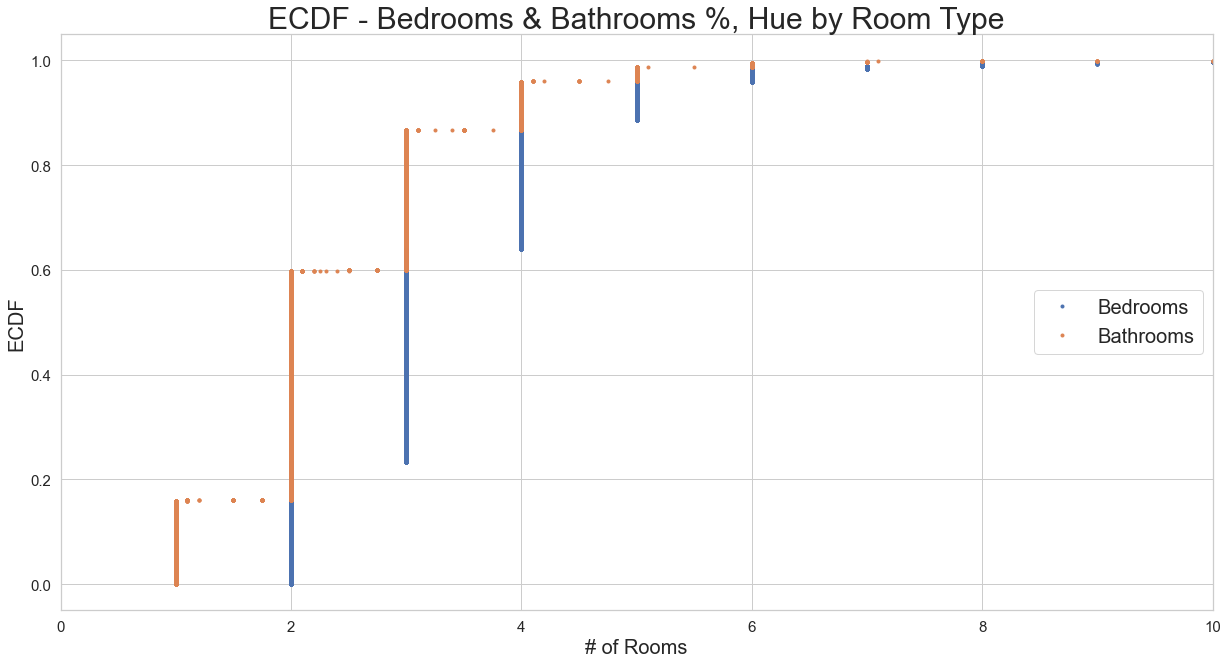

In [113]:
# Setting Theme
sns.set_theme(style="whitegrid") # all charts will have a light grid

# Function to convert x to array, y to the count %
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,1+n)/n
    return x, y

# Figure size and axis
fig = plt.figure(figsize=(20,10))
axes = fig.add_axes([0.1,0.1,0.8,0.8])

# Calculate x and y
x_1, y_1 = ecdf(house_df['Bedrooms'])
x_2, y_2 = ecdf(house_df['Bathrooms'])

# Plot ECDFs
axes.plot(x_1,y_1,marker ='.',linestyle='none')
axes.plot(x_2,y_2,marker ='.',linestyle='none')

# Legend
plt.legend(('Bedrooms','Bathrooms'),loc=7, prop={'size': 20})

# Annotation, Label, Tick, Title
plt.xlabel('# of Rooms', fontsize=20)
plt.ylabel('ECDF', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('ECDF - Bedrooms & Bathrooms %, Hue by Room Type', fontsize=30)
# Set limit for x
axes.set_xlim(0,10)

# Show plot
plt.show()


According to ECDF, there are more Bedrooms than Bathrooms.

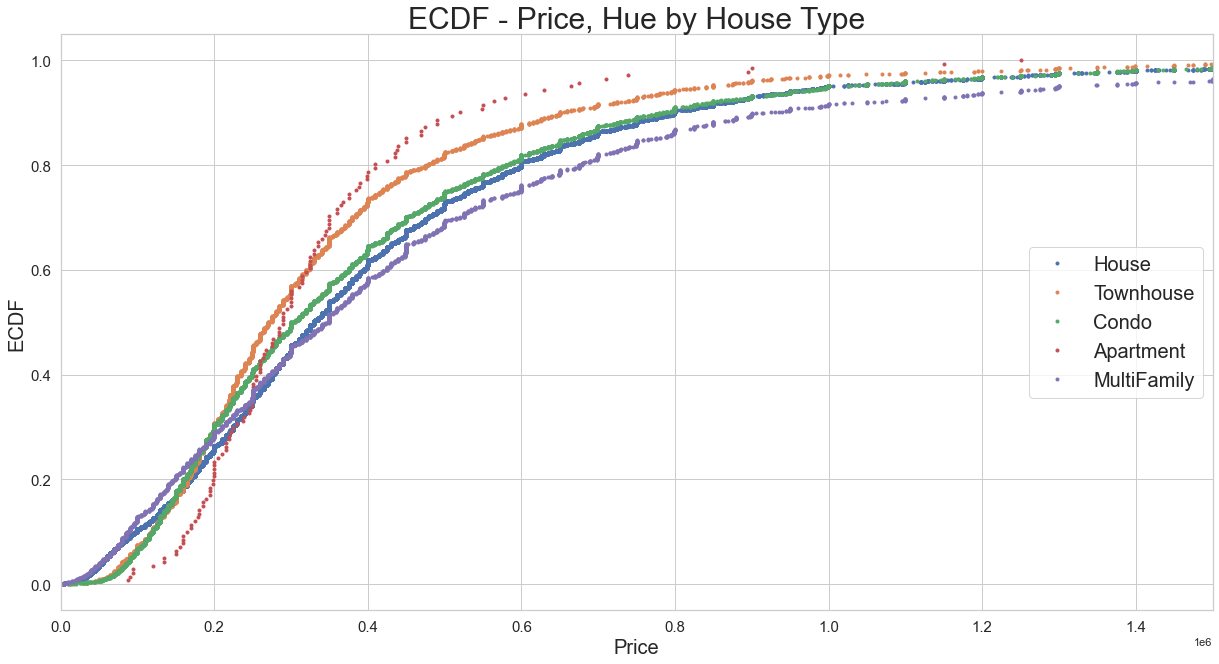

In [114]:
# Figure size and axis
fig = plt.figure(figsize=(20,10))
axes = fig.add_axes([0.1,0.1,0.8,0.8])

# Calculate x and y
x_1, y_1 = ecdf(house_df[house_df['Type'] == 'House']['Price'])
x_2, y_2 = ecdf(house_df[house_df['Type'] == 'Townhouse']['Price'])
x_3, y_3 = ecdf(house_df[house_df['Type'] == 'Condo']['Price'])
x_4, y_4 = ecdf(house_df[house_df['Type'] == 'Apartment']['Price'])
x_5, y_5 = ecdf(house_df[house_df['Type'] == 'Multifamily']['Price'])

# Plot ECDFs
axes.plot(x_1,y_1,marker ='.',linestyle='none')
axes.plot(x_2,y_2,marker ='.',linestyle='none')
axes.plot(x_3,y_3,marker ='.',linestyle='none')
axes.plot(x_4,y_4,marker ='.',linestyle='none')
axes.plot(x_5,y_5,marker ='.',linestyle='none')

# Legend
plt.legend(('House','Townhouse', 'Condo','Apartment','MultiFamily'),loc=7, prop={'size': 20})

# Annotation, Label, Tick, Title
plt.xlabel('Price', fontsize=20)
plt.ylabel('ECDF', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('ECDF - Price, Hue by House Type', fontsize=30)

# Set limit for x
axes.set_xlim(0,1500000)

# Show plot
plt.show()

<ul> Apartments near 200k range, have a clear premium/higher price than all other types of homes.</ul>
<ul> Appartments Prices drastrically change near 350k to 400k and becomes a lot lower comparing to others</ul>

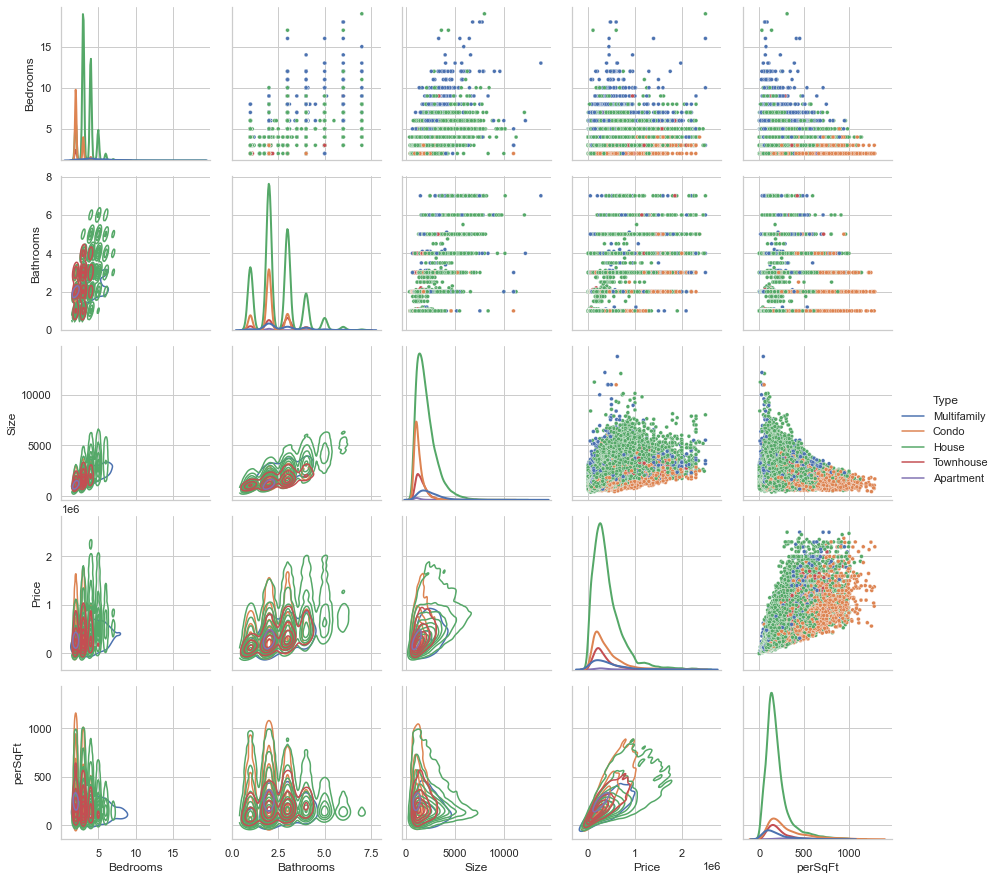

In [55]:
# DataFrame - sorting custom df for the plot
room_sorted_df = house_df[(house_df['Bedrooms']<=20) & (house_df["Bathrooms"] <= 7)]

# PairGrid - with the sorted data frame with hue
g = sns.PairGrid(room_sorted_df, diag_sharey=False, hue="Type")
# Upper side of grid is scatter
g.map_upper(sns.scatterplot, s=15)
# Lower side is KDE
g.map_lower(sns.kdeplot)
# Diagonal is also KDE 
g.map_diag(sns.kdeplot, lw=2)
# Adding legend
g.add_legend()

<ul> Top right side of graph, Orange - Condos has clearly smaller size </ul>
<ul> Bottom left side of graph, - Higher perSqFt has lessor Bedrooms </ul>

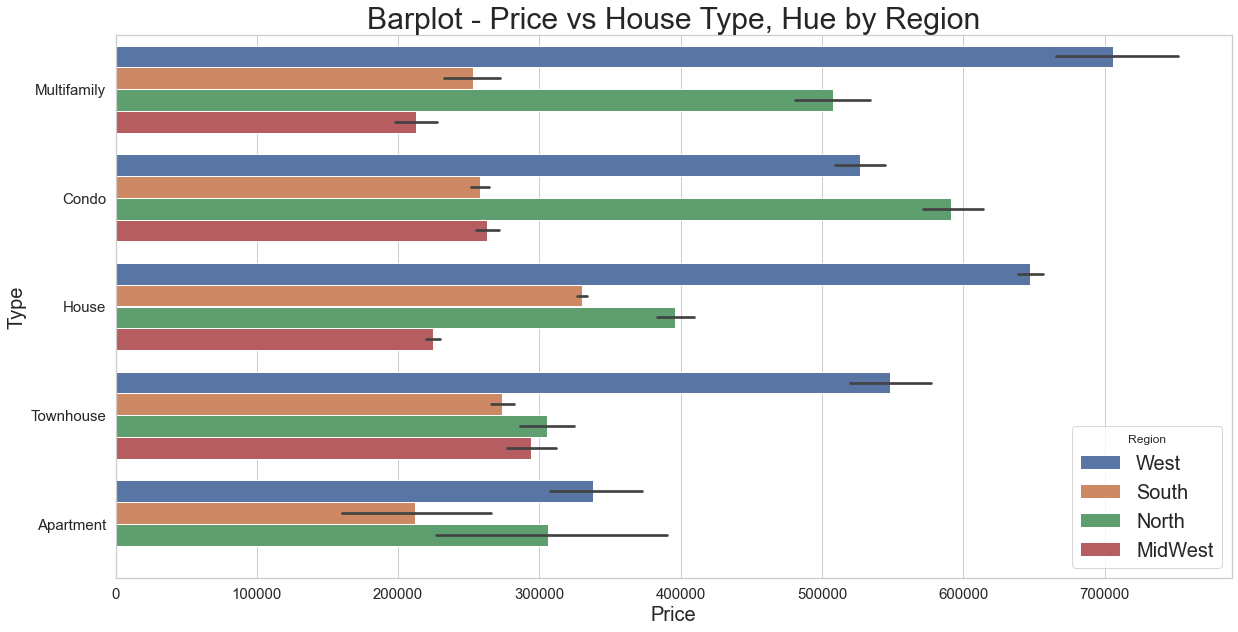

In [56]:

# Figure Size
plt.figure(figsize=(20,10))
# Countplot by state, how many data we have for each state
sns.barplot(data=house_df, x="Price", y="Type",hue="Region", palette="deep")

# Annotation, Label, Tick, Title
plt.xlabel('Price', fontsize=20)
plt.ylabel('Type', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Barplot - Price vs House Type, Hue by Region', fontsize=30)
plt.legend(title="Region", loc="lower right", fontsize=20)


<ul> Multifamily - West Regions is clearly higher than all other regions</ul>
<ul> Condo - North and West Regions is clearly higher than all other regions</ul>
<ul> House - West Region is clearly higher than all other regions, lowest for MidWest</ul>
<ul> Townhouses - West Region is clearly higher than all other regions, the prices for other regions are extremely close</ul>

<ul> Apartments - All Region's price all relatively close to each other</ul>
<ul>MidWest has few/no Apartments</ul>

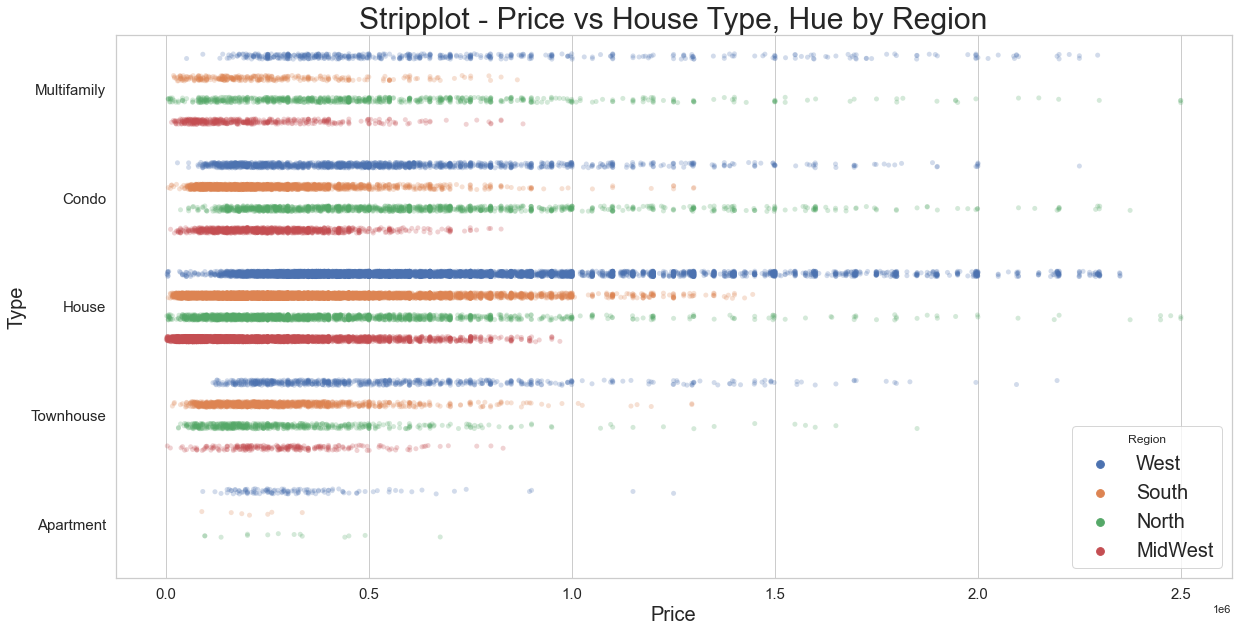

In [57]:
# Figure Size
plt.figure(figsize=(20,10))

# Stripplot
# Dodge is not to mix the color together. (if False, all the dots will be mixed together)
sns.stripplot(x="Price", y="Type", hue="Region", data=house_df, dodge=True, alpha=.25, zorder=1)

# Annotation
plt.xlabel('Price', fontsize=20)
plt.ylabel('Type', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Stripplot - Price vs House Type, Hue by Region', fontsize=30)
plt.legend(title="Region", loc="lower right", fontsize=20)

Stripplot can clearly see where most data is focused in for each Type of house via Region.

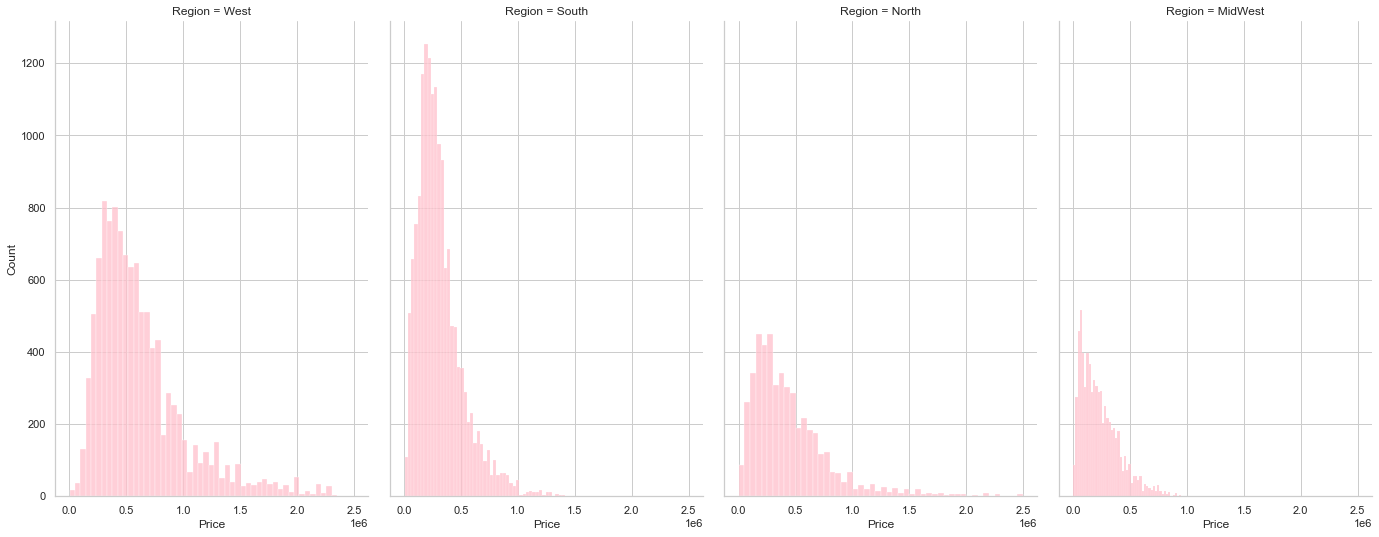

In [108]:
# FacetGrid - distribution by Price in Region
g = sns.FacetGrid(col='Region', data=house_df)
g.map(sns.histplot, 'Price', bins = 50, color='pink')
g.fig.set_figheight(10)
g.fig.set_figwidth(20)
# # Distribution plot of Prices divide into type of houses, hue of region.
# plt.figure(figsize=(20,10))
# sns.histplot(house_df,x='Price', hue='Region', edgecolor='0.5', bins=150,palette='bright', alpha=0.3)
# # Annotation
# plt.title('Histplot - Price, Hue by Region', fontsize=12)
# plt.xlabel('Price', fontsize=20)
# plt.ylabel('House Data Count', fontsize = 20)
# plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)

- West Region's most data is around 500k, comparing with other region, West have higher Price mean.
- South Region has most data points. Price is more focused around 250k, half of West Region.<br>
- MidWest has lowest Price mean, where most data is focused on the left side of Price
- Most distribution are positively skewed towards to the right.

Text(0.5, 1.0, 'Violinplot - Region vs Bathrooms')

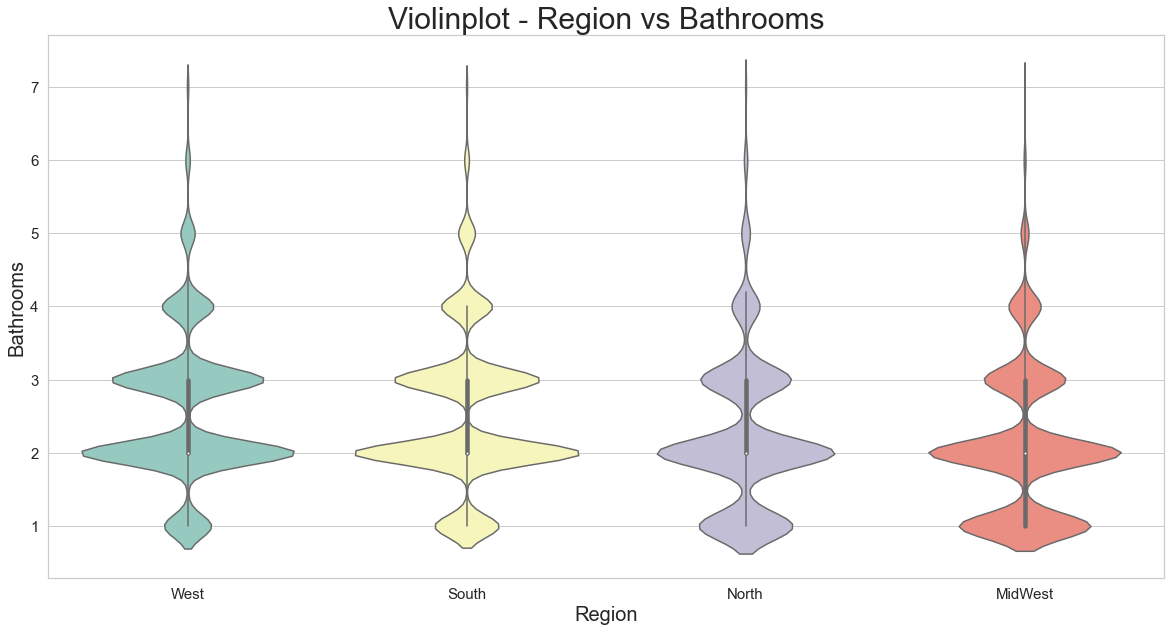

In [120]:

# Figure Size
plt.figure(figsize=(20,10))
bath_sorted_df = house_df[house_df["Bathrooms"] <= 7]
sns.violinplot(data=bath_sorted_df, x='Region',y='Bathrooms',palette="Set3")


# Annotation
plt.xlabel('Region', fontsize=20)
plt.ylabel('Bathrooms', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Violinplot - Region vs Bathrooms', fontsize=30)


Violinplot to see each Region's number of bathrooms and how are data focused.<br>
Overall, most data are around 2 and 3 Bathrooms. <br>
MidWest also have many houses with 1 Bathroom.

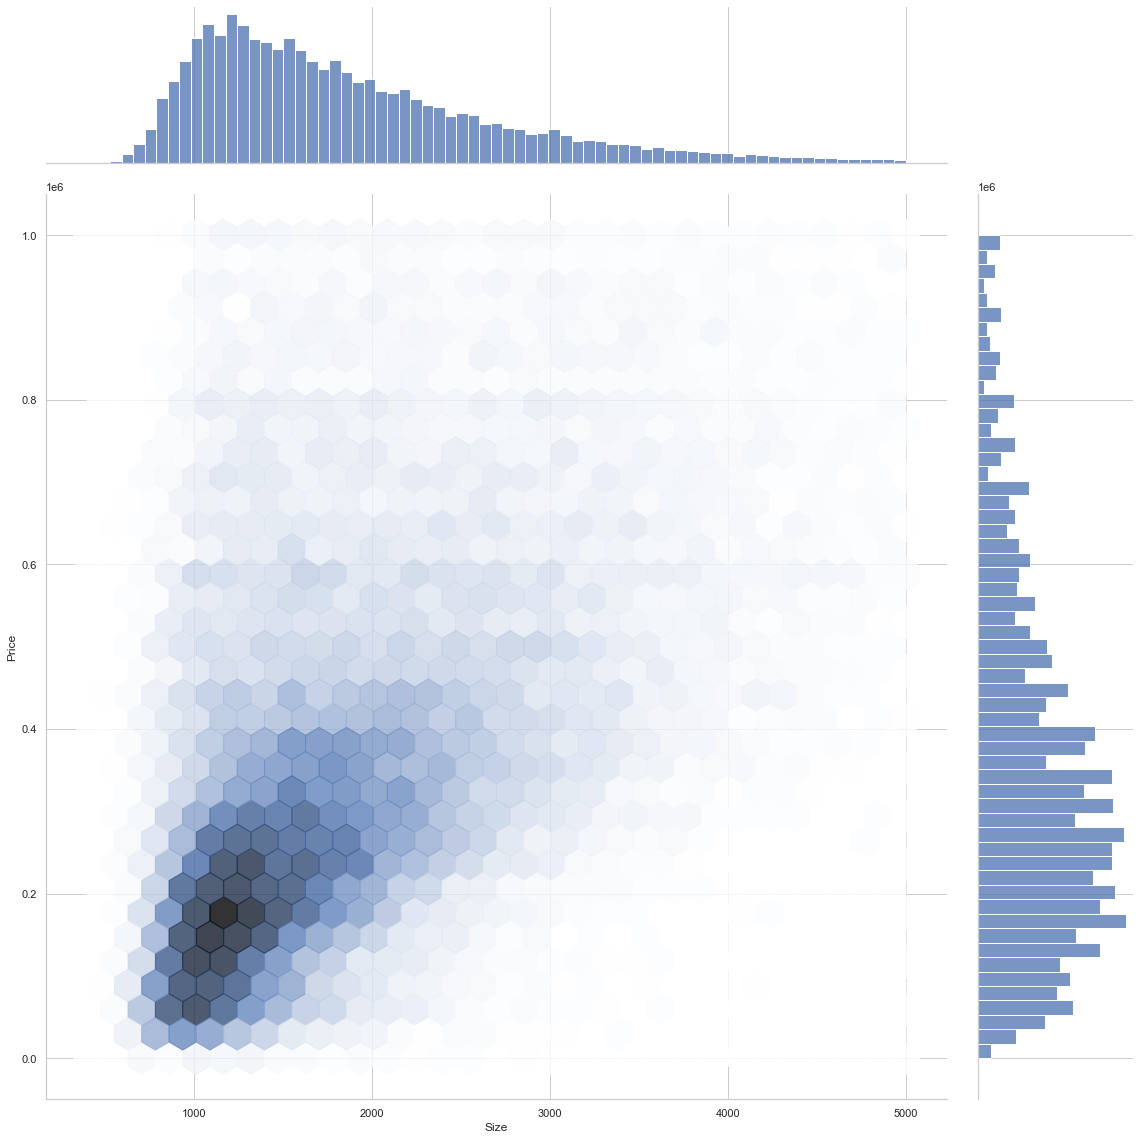

In [102]:
# DataFrame sorting custom df for graphing
price_sorted_df = house_df[(house_df["Price"] <= 1000000) & (house_df["Size"] <= 5000)]

# joint_kws is the hex size
sns.jointplot(y='Price', x='Size',data=price_sorted_df, alpha=0.8,kind="hex",joint_kws=dict(gridsize=30),height=16)


- Price: most data is around $200,000
- Size: most data is between early 1,000 to 2,000 SqFt

Text(0.5, 1.0, 'Violinplot - Type vs Size')

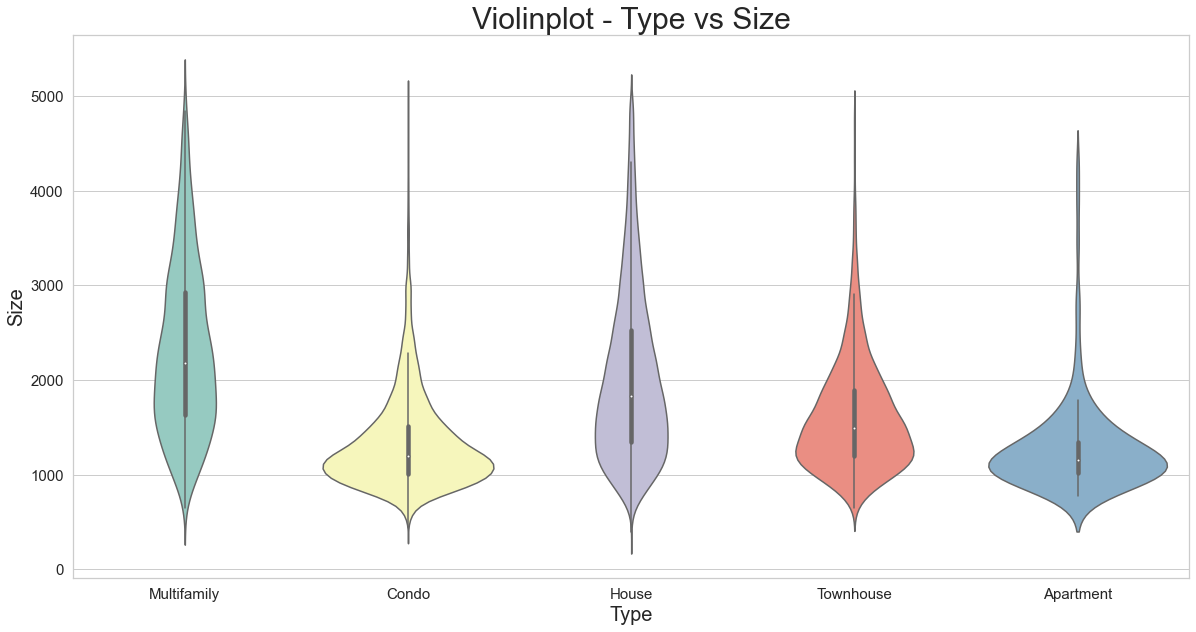

In [123]:
# Figure Size
plt.figure(figsize=(20,10))
# Dataframe sort custom df for graph
bath_sorted_df = house_df[house_df["Size"] <= 5000]
sns.violinplot(data=bath_sorted_df, x='Type',y='Size',palette="Set3")

# Annotation
plt.xlabel('Type', fontsize=20)
plt.ylabel('Size', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Violinplot - Type vs Size', fontsize=30)

Condo and Apartment are wider around 1000 SqFt. <br>
Multifamily and House are slimmer where all data is spread between 1k and 4k, clearly multifamily have larger sizes. <br>
Townhouse is in between Condos vs Multifamilies

Text(0.5, 1.0, 'Countplot - Amount of House Data for each State')

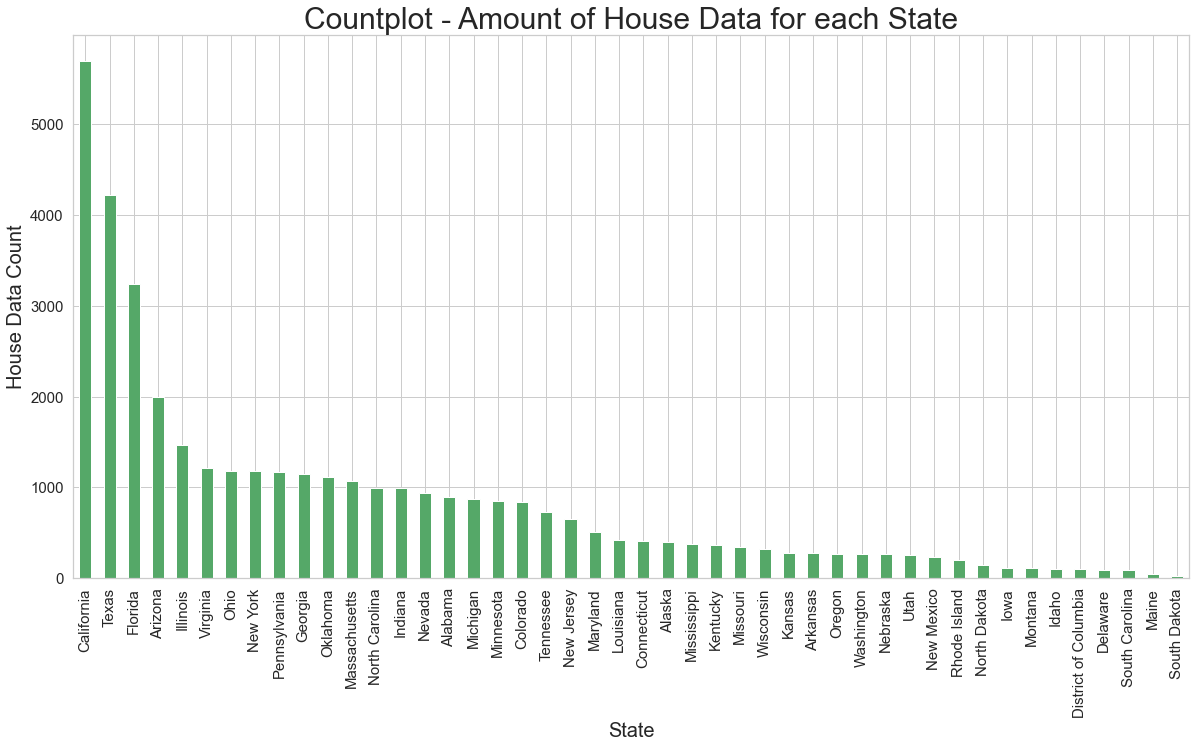

In [61]:
# Countplot by state, how many data we have for each state
plt.figure(figsize=(20,10))
house_df['fullState'].value_counts().plot(kind='bar',color='g')

# Annotation
plt.xlabel('State', fontsize=20)
plt.ylabel('House Data Count', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.title('Countplot - Amount of House Data for each State', fontsize=30)

We have most data in California, Texas, and Florida. Partial indicator that these states have more real estate activities.

Text(0.5, 1.0, 'Countplot - Region, Hue by Type')

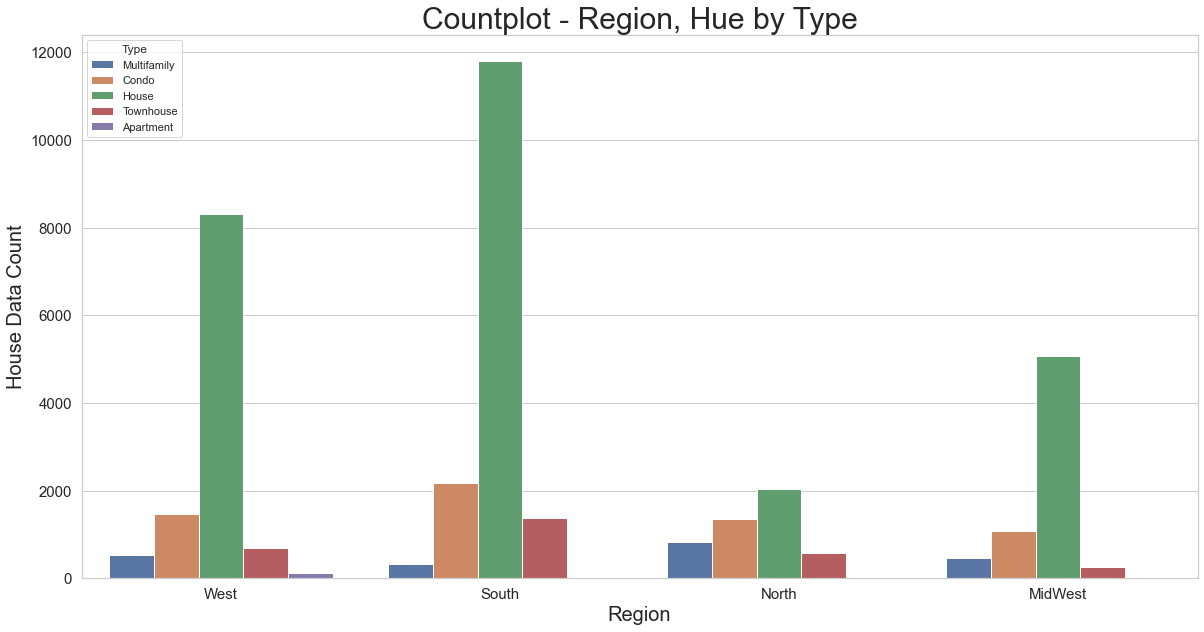

In [62]:
# Count plot x is region and hue is Type of houses
plt.figure(figsize=(20,10))
g=sns.countplot(x='Region',data=house_df,hue='Type')
g.set(ylim=(0, None))

# Annotation
plt.xlabel('Region', fontsize=20)
plt.ylabel('House Data Count', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Countplot - Region, Hue by Type' , fontsize=30)

Countplot by Region and Hue by Property Types. <br>1. Single Family Residence are primary market for United States<br>2. Condos are 2nd, follow by Townhouses as 3rd
<br>
The North Region has a high percentage of Condos and Townhouses relative to the houses. 

Text(0.5, 1.0, 'Stack Histplot - State House Count Stack by Type')

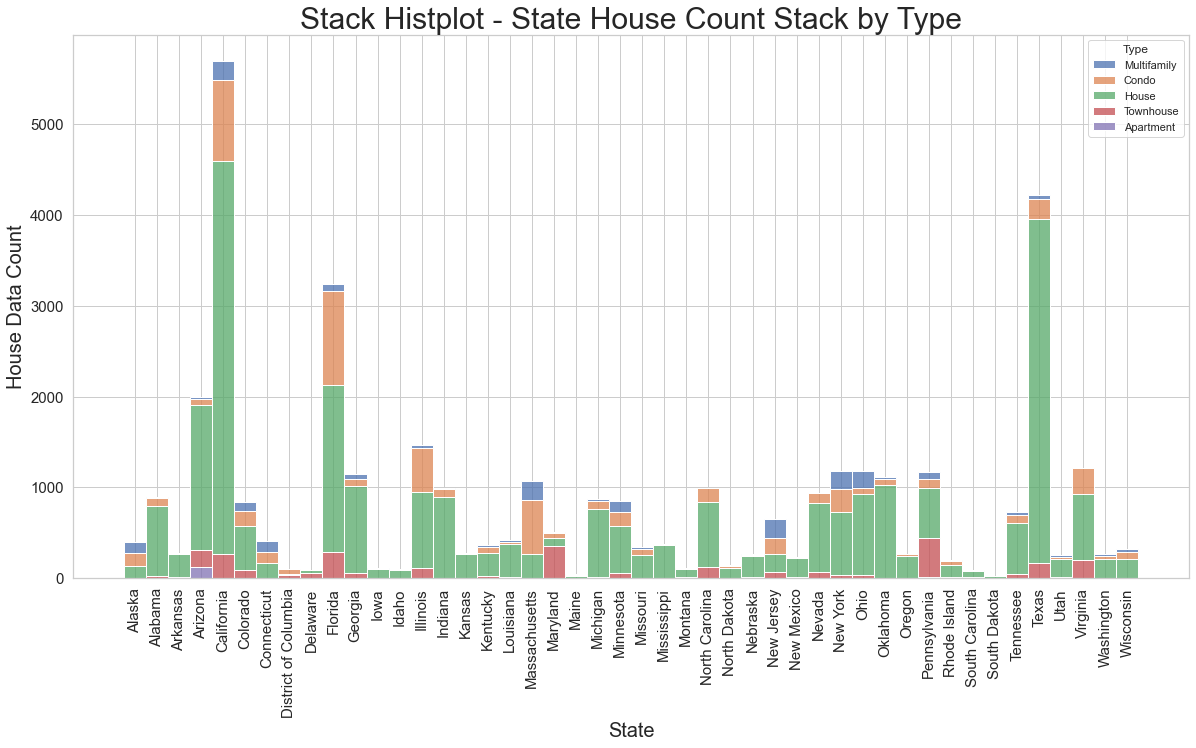

In [63]:
# Histplot stacked by type
plt.figure(figsize=(20,10))
sns.histplot(data=house_df,x='fullState',hue='Type',multiple='stack',edgecolor='white')

# Annotation
plt.xlabel('State', fontsize=20)
plt.ylabel('House Data Count', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.title('Stack Histplot - State House Count Stack by Type', fontsize=30)

- Massachusetts, Alaska, District of Columbia are primarily Condos.<br>
- Maryland, Pennylvania, Delaware are primarily Townhouses or have huge % in Townhouses.

Text(0.5, 1.0, 'Scatter - perSqFt vs Size, Hue by Type')

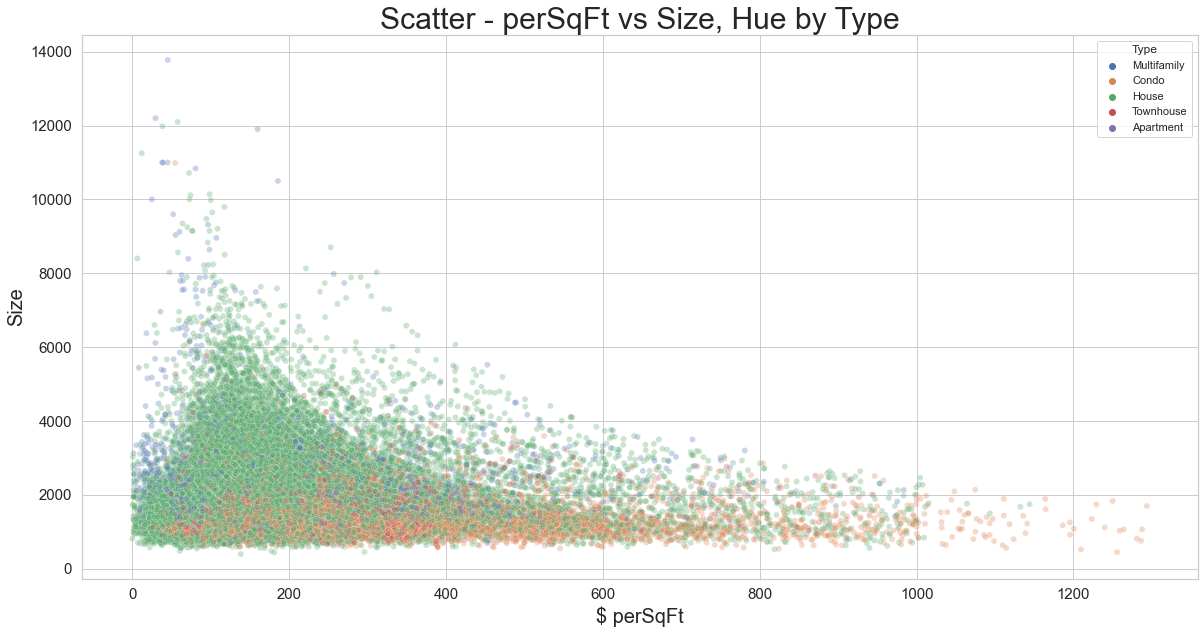

In [64]:
# Scatterplot perSqFt, Size, hue by Type
plt.figure(figsize=(20,10))

sns.scatterplot(data=house_df,x='perSqFt',y='Size',hue='Type', alpha=0.3)

# Annotation
plt.xlabel('$ perSqFt', fontsize=20)
plt.ylabel('Size', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Scatter - perSqFt vs Size, Hue by Type', fontsize=30)




- The higher the perSqFt the smaller the house Size. <br> 
- Most Condos have higher perSqFt prices.

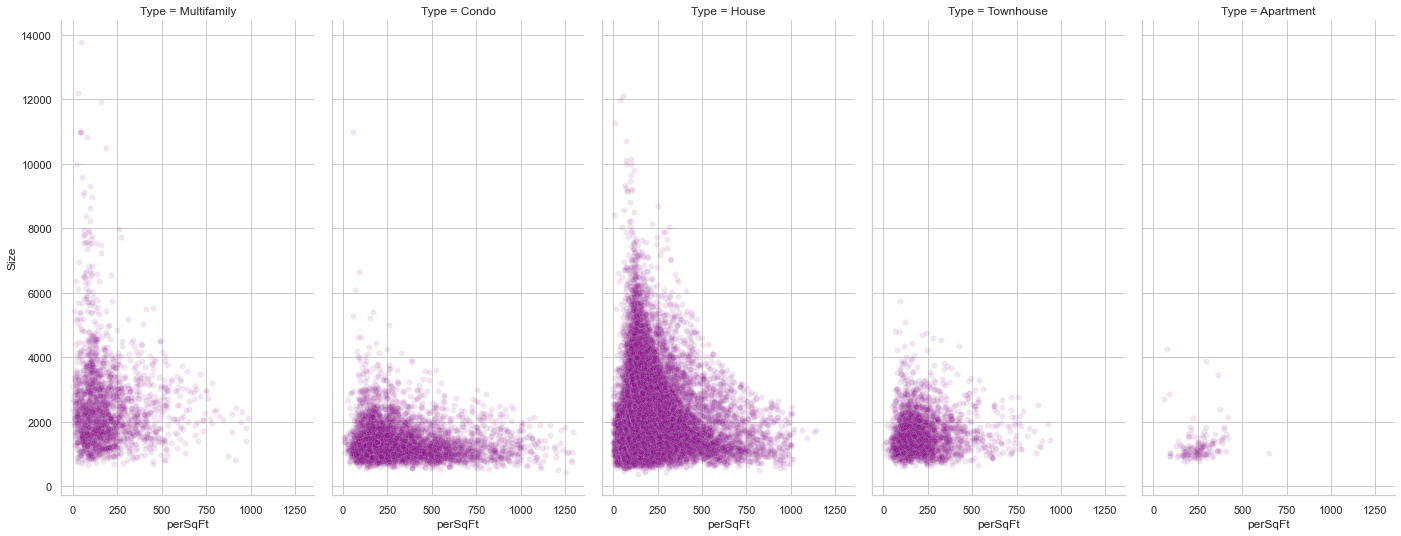

In [118]:
# FacetGrid
g = sns.FacetGrid(col='Type', data=house_df)
# Map out with scatter plot X perSqFt, y Size, Columns by Type
g.map(sns.scatterplot, "perSqFt", 'Size', alpha=0.1, color='purple')

# Figsize
g.fig.set_figheight(10)
g.fig.set_figwidth(20)

Multifamily perSqFt are mostly focused between $0 - $250. <br>
Condo Size are clearly smarller. Most focused under 2000 SqFt <br>
House is everywhere, but theres clearly negative relationship between Size and perSqFt. <br>
Townhouse and Apartment is focused under 2000 SqFt and between $0 - $250 perSqFt

Text(0.5, 1.0, 'Boxenplot - Price vs Size Category')

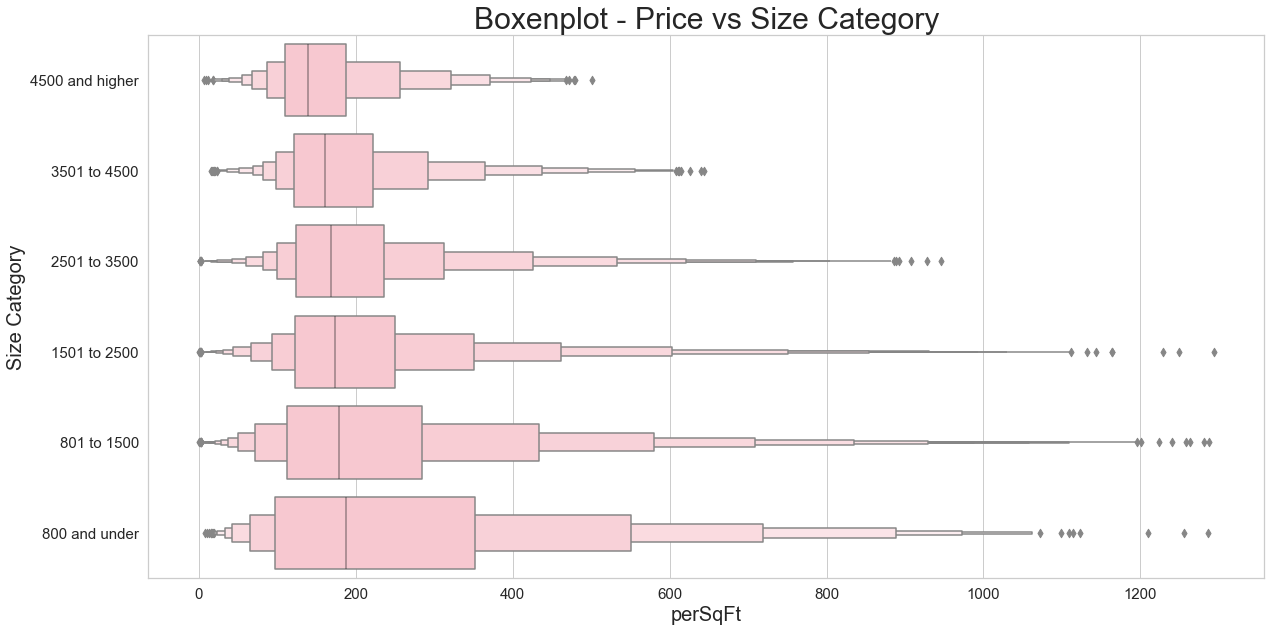

In [125]:
# List - Making Size Category list, so we can sort it later
sizeCat_list = list(house_df['SizeCat'].unique())
sizeCat_list

# Figure Size
plt.figure(figsize=(20,10))
# List - Sort the Size Category
sizeCat_list_sorted =['800 and under','801 to 1500', '1501 to 2500','2501 to 3500','3501 to 4500','4500 and higher'][::-1]
# Boxenplot
sns.boxenplot(y="SizeCat", x="perSqFt", color="pink", order=sizeCat_list_sorted, data=house_df)


# Annotation
plt.xlabel('perSqFt', fontsize=20)
plt.ylabel('Size Category', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Boxenplot - perSqFt vs Size Category', fontsize=30)

Text(0.5, 1.0, 'Boxenplot - Price vs Size Category')

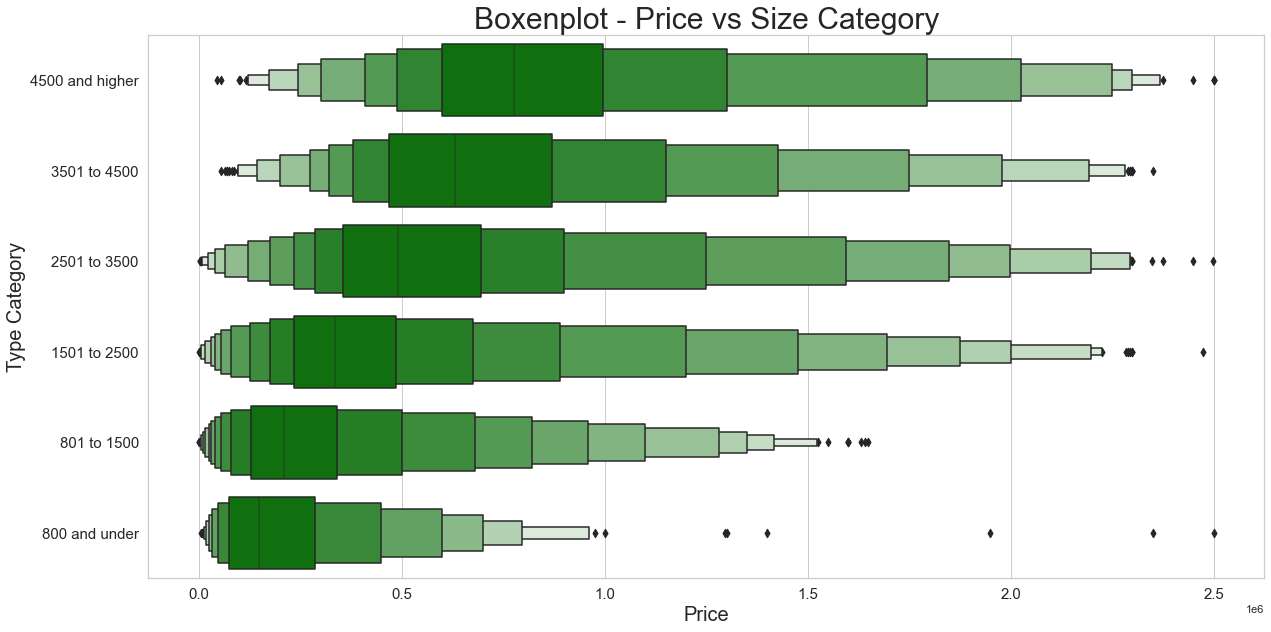

In [126]:
# List - Making Size Category list, so we can sort it later
sizeCat_list = list(house_df['SizeCat'].unique())
sizeCat_list

# Figure Size
plt.figure(figsize=(20,10))
# List - Sort the Size Category
sizeCat_list_sorted =['800 and under','801 to 1500', '1501 to 2500','2501 to 3500','3501 to 4500','4500 and higher',][::-1]
# Boxenplot
sns.boxenplot(y="SizeCat", x="Price",color="green", scale='linear',order=sizeCat_list_sorted, data=house_df)


# Annotation
plt.xlabel('Price', fontsize=20)
plt.ylabel('Type Category', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Boxenplot - Price vs Size Category', fontsize=30)

Text(0.5, 1.0, 'Scatter - Price vs Size, Hue by Type')

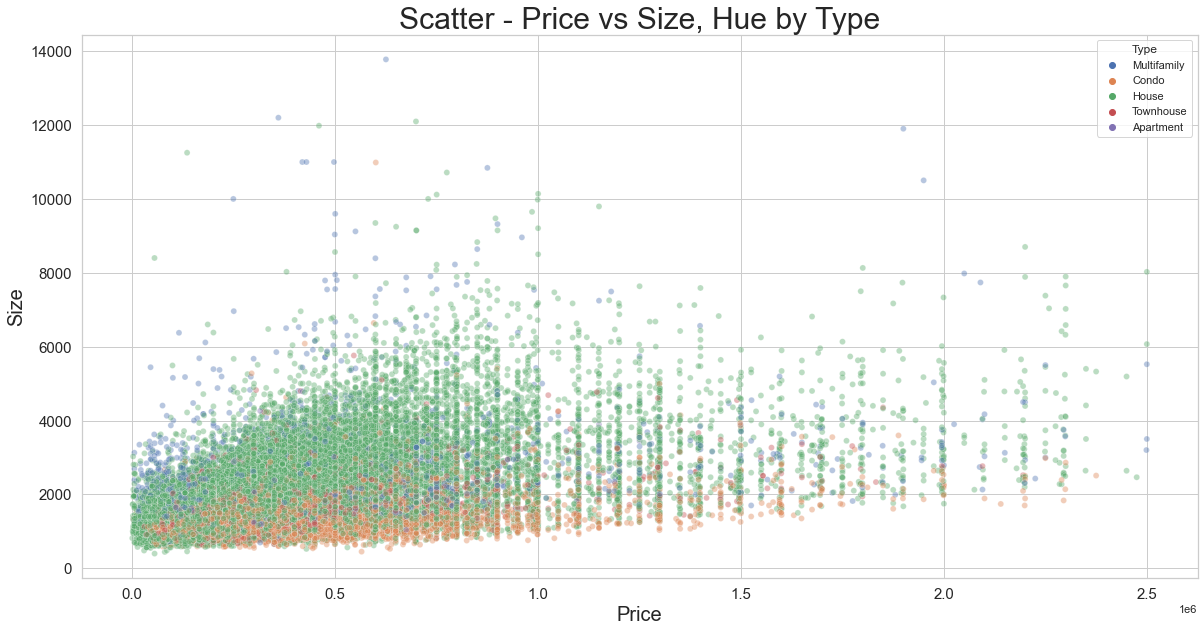

In [68]:
# Scatterplot perSqFt, Size, hue by Type
plt.figure(figsize=(20,10))
sns.scatterplot(data=house_df,x='Price',y='Size',hue='Type', alpha=0.4)

# Annotation
plt.xlabel('Price', fontsize=20)
plt.ylabel('Size', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Scatter - Price vs Size, Hue by Type', fontsize=30)

- Slight correlation between Price and Size. The larger the house the price will be slightly increased. <br>
- Condo size is at the bottom of chart

Text(0.5, 1.0, 'Boxplot - State vs Price')

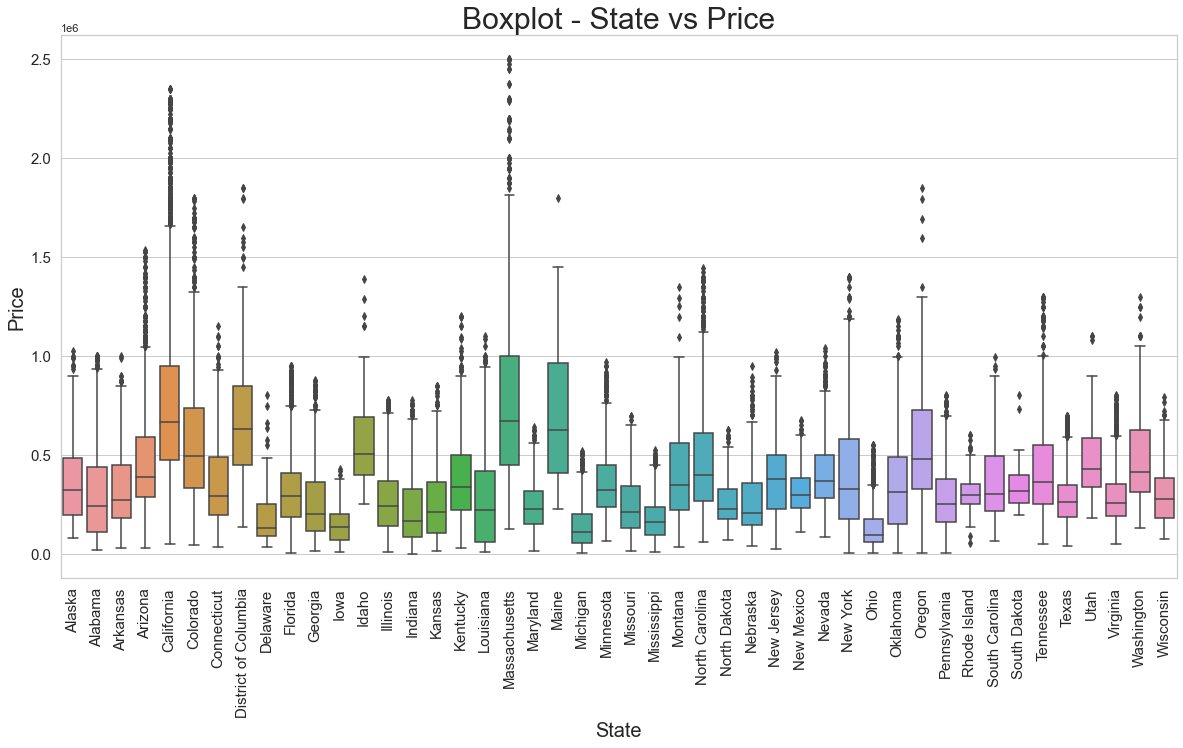

In [69]:
# Boxplot of States by House price
plt.figure(figsize=(20,10))
ax = sns.boxplot(data = house_df, x = 'fullState' , y = 'Price')

# Annotation
plt.xlabel('State', fontsize=20)
plt.ylabel('Price', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.title('Boxplot - State vs Price', fontsize=30)

- The house price for California, District of Columbia, Maine, Massachusetts are fairly high. there are extreme outliers in many states. <br>
- Rich people are everywhere! <br>Double BAM!!

Text(0.5, 1.0, 'Boxplot - State vs perSqFt')

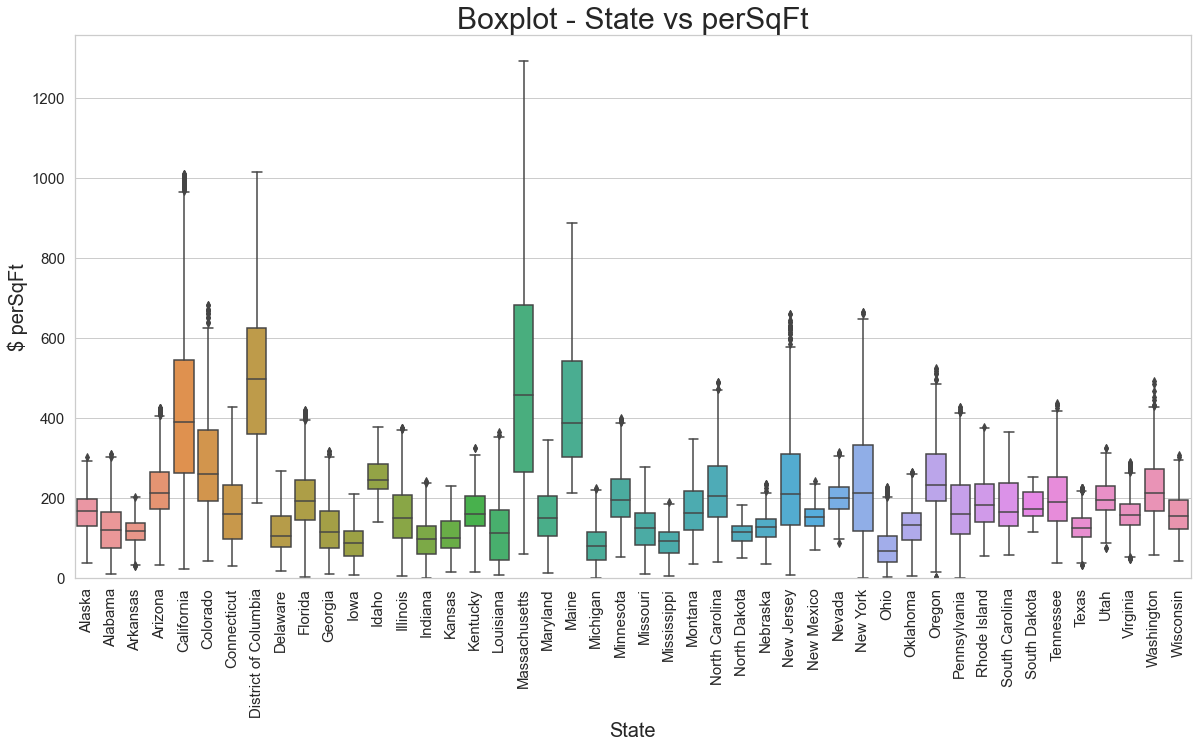

In [70]:
# Boxplot of States by $ perSqFt
plt.figure(figsize=(20,10))
ax = sns.boxplot(data = house_df, x = 'fullState' , y = 'perSqFt')
ax.set_ylim(0,None)

# Annotation
plt.xlabel('State', fontsize=20)
plt.ylabel('$ perSqFt', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.title('Boxplot - State vs perSqFt', fontsize=30)


- The $ perSqFt for the same states; California, District of Columbia, Massachusetts, Maine are clearly top 4 again.
<br>
- Comparing with the Price boxplot, Maine has higher Prices, lower perSqFt. So the house Size there should be proportionally larger. <br> This is exact opposite for District of Columbia lower Prices, higher perSqFt. So house Size should be proportionally smaller.

#### State_df

##### Descriptive for State_df

In [71]:
state_df.head()

fullState        GDP   Spending  Population     Income Region State  \
0     Alabama  196906.10  176479.80     4934193  228748.80  South    AL   
1      Alaska   50161.00   35635.70      724357   46430.30   West    AK   
2     Arizona  320550.60  287090.10     7520103  368458.60   West    AZ   
3    Arkansas  114943.50  104488.80     3033946  143147.90  South    AR   
4  California 2663665.90 1835980.60    39613493 2763312.00   West    CA   

   Bathrooms  Bedrooms     Price    Size  perSqFt  HouseCount  SavingsRate  \
0       2.62      3.38 305048.89 2319.30   124.37         892         0.23   
1       2.97      4.59 363202.40 2392.84   165.54         403         0.23   
2       2.51      3.34 466962.46 2070.79   224.66        1998         0.22   
3       2.96      3.64 337014.73 2804.81   117.71         280         0.27   
4       2.56      3.44 776273.37 1965.24   424.09        5696         0.34   

   Years_of_Savings  perAnnualIncome  
0              5.76         46359.92  
1              4.87         64098.64  
2              8.63         48996.48  
3              5.29         47182.09  
4              6.63         69756.84

In [72]:
state_df.describe()

GDP   Spending  Population     Income  Bathrooms  Bedrooms  \
count      46.00      46.00       46.00      46.00      46.00     46.00   
mean   390208.88  299606.37  7078103.24  419131.06       2.42      3.37   
std    482294.66  340567.83  7600879.42  496796.28       0.29      0.34   
min     46158.10   33631.30   714153.00   46430.30       1.81      2.78   
25%    118834.20   98120.93  2929519.75  129528.12       2.23      3.16   
50%    229092.70  187682.30  5106011.50  265093.00       2.46      3.33   
75%    492387.12  365095.10  8402224.00  531894.30       2.61      3.44   
max   2663665.90 1835980.60 39613493.00 2763312.00       2.97      4.59   

          Price    Size  perSqFt  HouseCount  SavingsRate  Years_of_Savings  \
count     46.00   46.00    46.00       46.00        46.00             46.00   
mean  371094.07 2024.62   191.74      836.50         0.27              5.02   
std   160612.69  304.99    99.39     1081.74         0.04              2.52   
min   134835.39 1525.06    79.80       25.00         0.16              1.88   
25%   270628.96 1774.21   124.58      255.50         0.23              3.28   
50%   345951.25 2035.53   167.14      415.50         0.27              4.20   
75%   425050.39 2275.08   217.56     1050.50         0.30              6.44   
max   800828.82 2804.81   501.47     5696.00         0.36             16.01   

       perAnnualIncome  
count            46.00  
mean          57397.29  
std            9664.06  
min           42134.54  
25%           51108.37  
50%           54791.33  
75%           61796.02  
max           86404.59

In [73]:
# Finding Highest/Lowest 3 States of per square footage and size
sqft_top = state_df.sort_values(by='perSqFt',ascending=False).head(3)[['State','perSqFt']]
sqft_bot = state_df.sort_values(by='perSqFt',ascending=True).head(3)[['State','perSqFt']]
size_top = state_df.sort_values(by='Size',ascending=False).head(3)[['State','Size']]
size_bot = state_df.sort_values(by='Size',ascending=True).head(3)[['State','Size']]
# For loop to print the output for $ perSqFt
print('Top 3 Highest and Lowest $ perSqFt')
dflist = sqft_top, sqft_bot
for d in dflist:
    dict_d = dict(zip(d.iloc[:,0],d.iloc[:,1]))
    for k in dict_d:
        print('State {} have average of ${:.2f} per square feet'.format(k,dict_d[k]))

# For loop to print the output for Size
print('\nTop 3 Largest and Smallest House Size')
dflist2 = size_top, size_bot
for d in dflist2:
    dict_d = dict(zip(d.iloc[:,0],d.iloc[:,1]))
    for k in dict_d:
        print('State {} have average of {:.0f} square feet.'.format(k,dict_d[k]))

Top 3 Highest and Lowest $ perSqFt
State MA have average of $501.47 per square feet
State DC have average of $500.22 per square feet
State ME have average of $437.12 per square feet
State OH have average of $79.80 per square feet
State MI have average of $86.42 per square feet
State MS have average of $90.56 per square feet

Top 3 Largest and Smallest House Size
State AR have average of 2805 square feet.
State UT have average of 2524 square feet.
State OK have average of 2511 square feet.
State DC have average of 1525 square feet.
State DE have average of 1538 square feet.
State MD have average of 1578 square feet.


In [74]:
# Groupby table #2
state_df.groupby(['Region']).mean()

GDP  Spending  Population    Income  Bathrooms  Bedrooms  \
Region                                                                   
MidWest 295767.66 233952.69  5709479.67 319849.12       2.19      3.24   
North   450836.24 333676.30  6821733.50 487617.51       2.27      3.37   
South   409233.81 327572.71  8341364.40 443628.85       2.50      3.29   
West    423199.96 308314.50  7034969.00 444224.20       2.65      3.62   

            Price    Size  perSqFt  HouseCount  SavingsRate  Years_of_Savings  \
Region                                                                          
MidWest 248014.61 1940.53   128.11      571.92         0.27              3.18   
North   496524.37 1790.17   307.33      602.12         0.29              5.59   
South   314451.73 2069.02   150.68     1045.67         0.26              4.95   
West    491380.10 2226.31   233.09     1010.36         0.26              6.70   

         perAnnualIncome  
Region                    
MidWest         56367.56  
North           70962.55  
South           51799.11  
West            56288.87

- Years of Saving to buy a house is highest in West Region than other regions and Lowest in MidWest Region. <br>
- Individual's Income highest in North Region, lowest in South Region.
- perSqFt highest in North lowest in MidWest.

##### Visualization for state_df

Text(0.5, 1.0, 'Heatmap - Correlation')

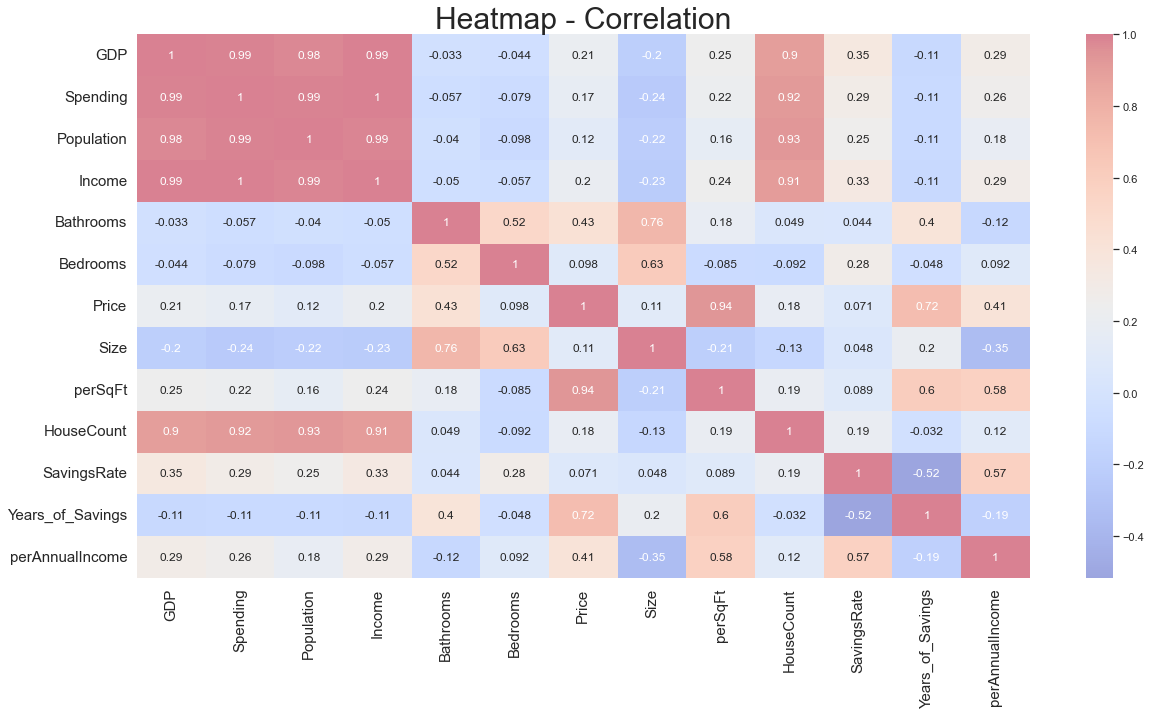

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(state_df.corr(),cmap='coolwarm' ,annot=True, alpha=0.5)


plt.xticks(rotation=30)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.title('Heatmap - Correlation', fontsize=30)

Savings Rate is correlated highest with GDP and Income.
<br>

The house count is highly correlated with population. More population, more housing activity.
<br>

The $ perSqFt has highest correlation with GDP
<br>

Size is highest correlated with Bedrooms, second correlated with Bathrooms. <br>It is negatively correlated with GDP, Population, Income, Spending, $ perSqFt, and HouseCount.
<br>

Bedrooms almost same relationship correlations as Size
<br>

Unlike Bedrooms and Size, Bathrooms has a high correlation with Price.


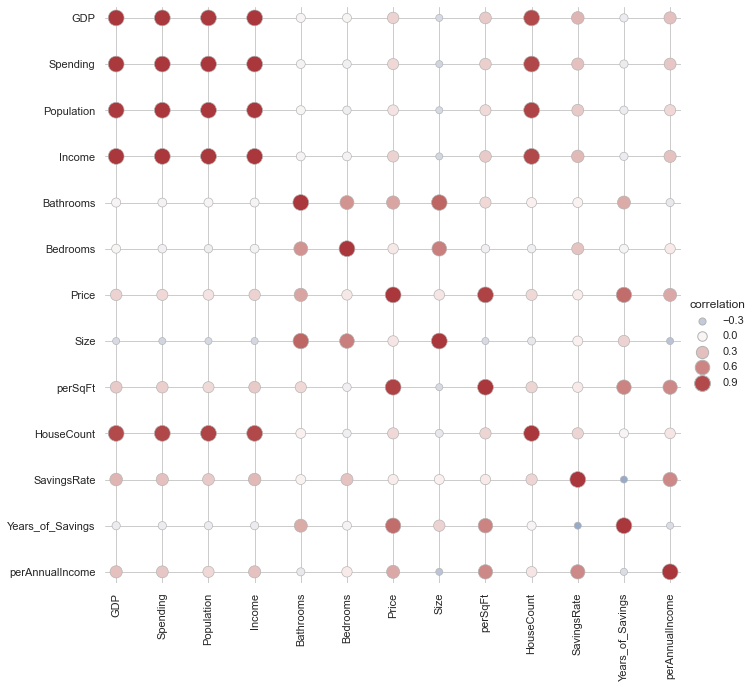

In [77]:
# Heat Scatter
# Source: https://seaborn.pydata.org/examples/heat_scatter.html
# Note: this map is literally from the source, i really liked it thats why i want to plot it.



# Compute a correlation matrix and convert to long-form
corr_mat = state_df.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

<AxesSubplot:xlabel='Bathrooms', ylabel='Price'>

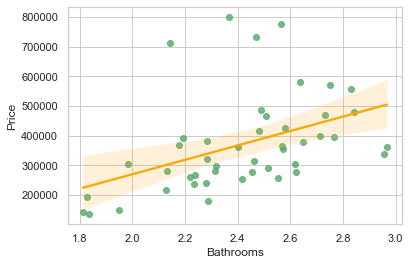

In [78]:
sns.regplot(data=state_df,y="Price", x="Bathrooms", color="g",line_kws={'color':'orange'})

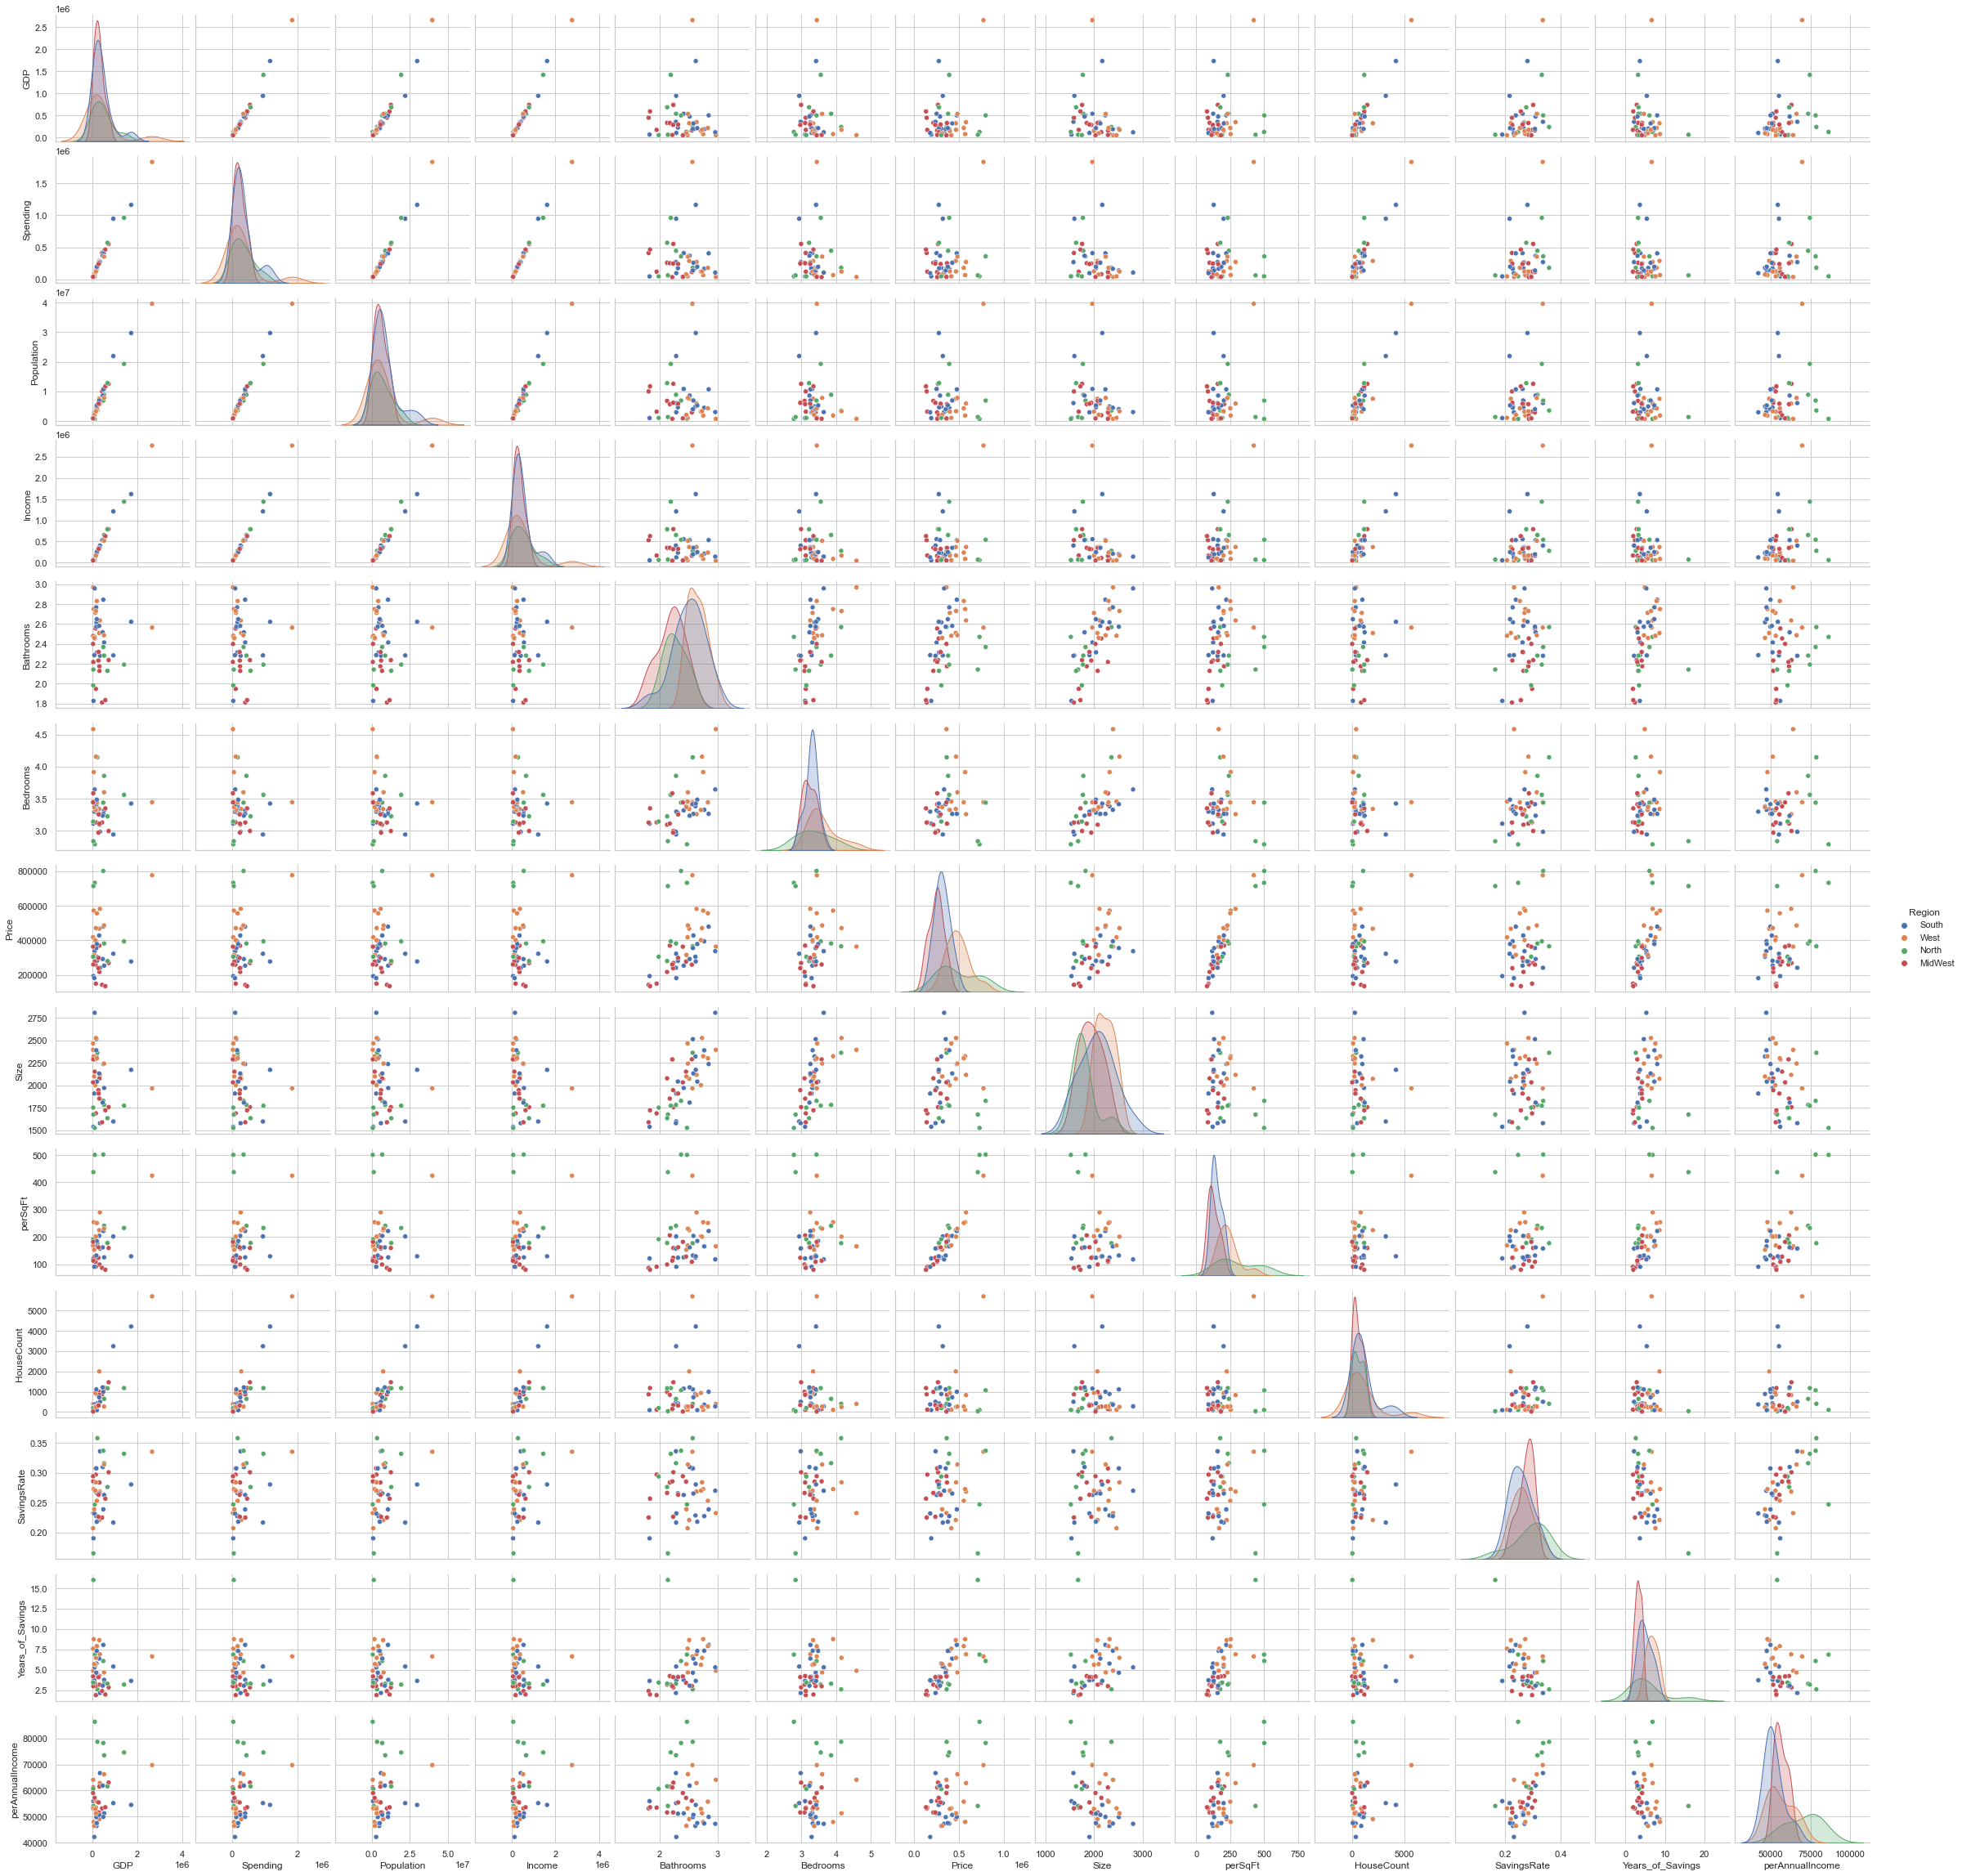

In [79]:
# Print pairplot to visualize the correlations. 
sns.pairplot(data=state_df, hue="Region")
# the more money you have the more bathrooms you will get.

GDP Income Spending and Population have a strong correlation. <br>
Additionally, number of houses sold also have a strong correlation with these. So more real estate activity with higher GDP Income Spending and Population
 <br>
SavingsRate and Bedrooms are slightly, the more you save the more bedrooms you are going to get.
<br>
Of course the bigger the house, the more Bedrooms and Bathrooms you will have.
<br>
SavingsRate and HouseCount has a slight correlation, the more you save, the more real estate activities there will be.

Text(0.5, 1.0, 'Barplot - State vs Population')

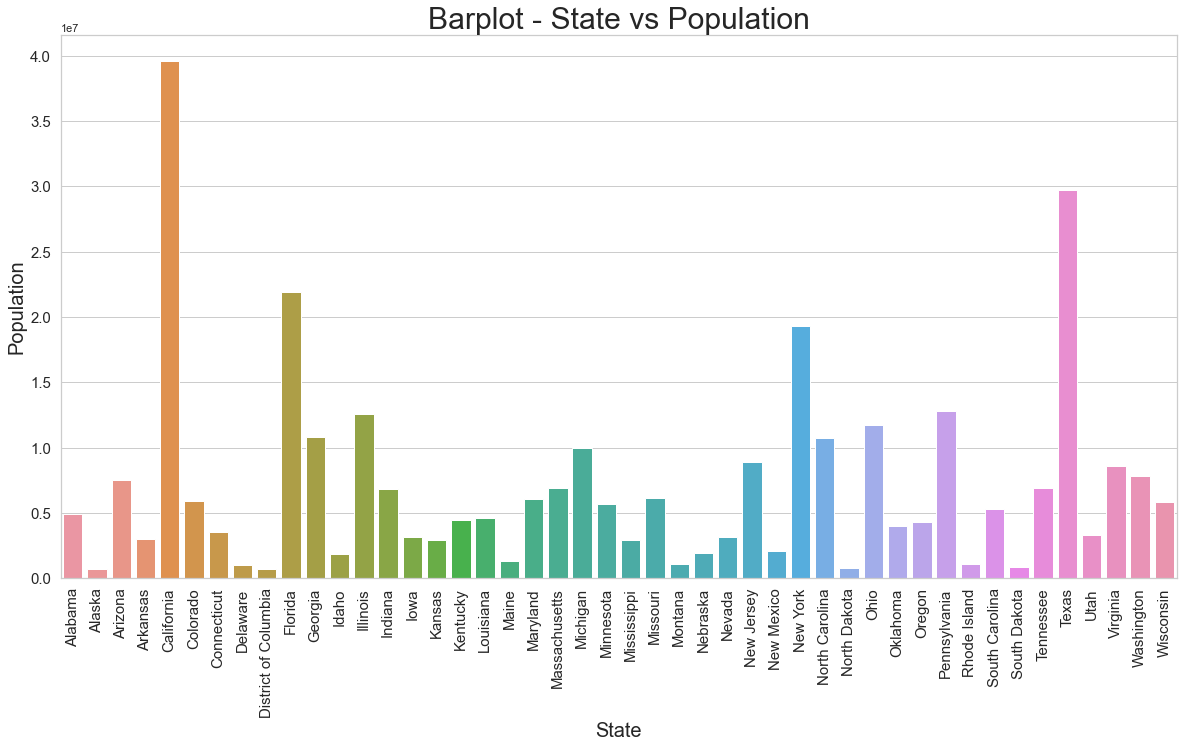

In [80]:
# Barplot
plt.figure(figsize=(20,10))
sorted_df = state_df.sort_values(by='Population',ascending=False)
sns.barplot(data=state_df, x='fullState',y='Population')

# Annotation
plt.xlabel('State', fontsize=20)
plt.ylabel('Population', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.title('Barplot - State vs Population', fontsize=30)

- Sorting states by population. Interesting enough that CA TX FL have most housing activities too. <br>
- AZ has the 4th housing count, but the population is 14th. So AZ has a lot more real estate activities per person.

In [81]:
state_df.head(1)

fullState       GDP  Spending  Population    Income Region State  Bathrooms  \
0   Alabama 196906.10 176479.80     4934193 228748.80  South    AL       2.62   

   Bedrooms     Price    Size  perSqFt  HouseCount  SavingsRate  \
0      3.38 305048.89 2319.30   124.37         892         0.23   

   Years_of_Savings  perAnnualIncome  
0              5.76         46359.92

Text(0.5, 1.0, 'Barplot - State vs Population')

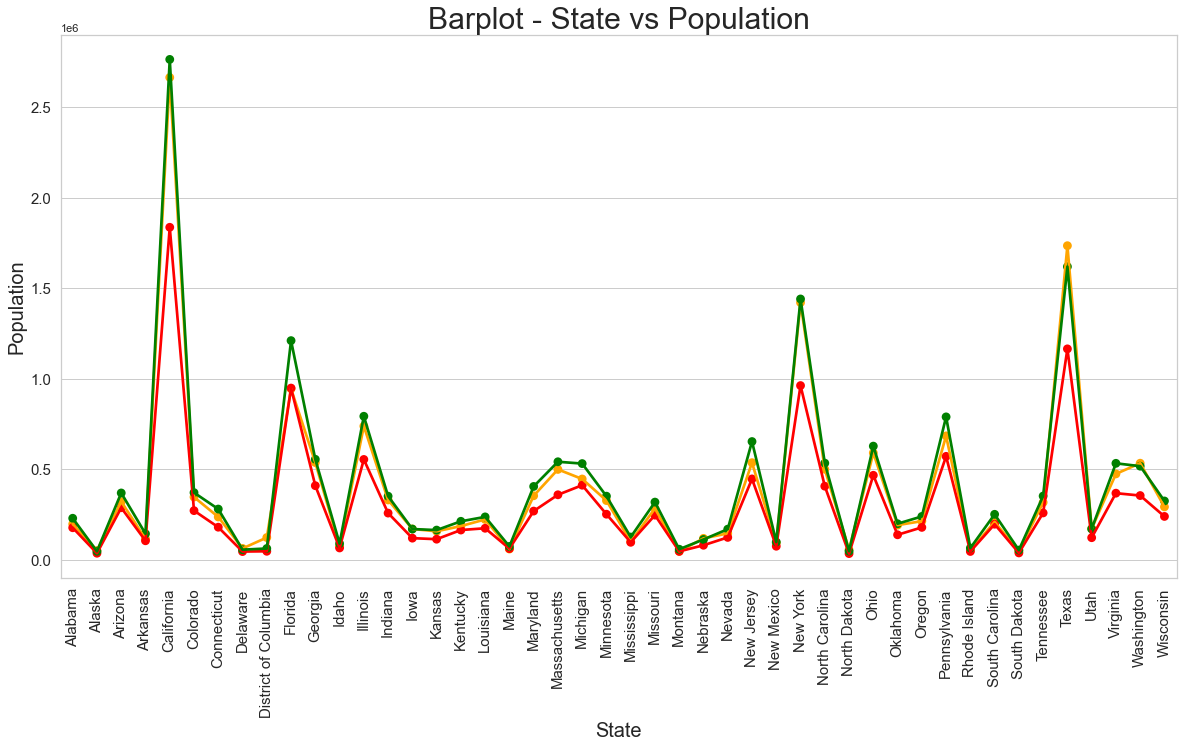

In [82]:
plt.figure(figsize=(20,10))
sns.pointplot(data=state_df,x="fullState",y="GDP", color='orange')
sns.pointplot(data=state_df,x="fullState",y="Spending", color='red')
sns.pointplot(data=state_df,x="fullState",y="Income", color='Green')

# Annotation
plt.xlabel('State', fontsize=20)
plt.ylabel('Population', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.title('Barplot - State vs Population', fontsize=30)

Text(0.5, 1.0, 'Regplot - SavingsRate vs perSqFt')

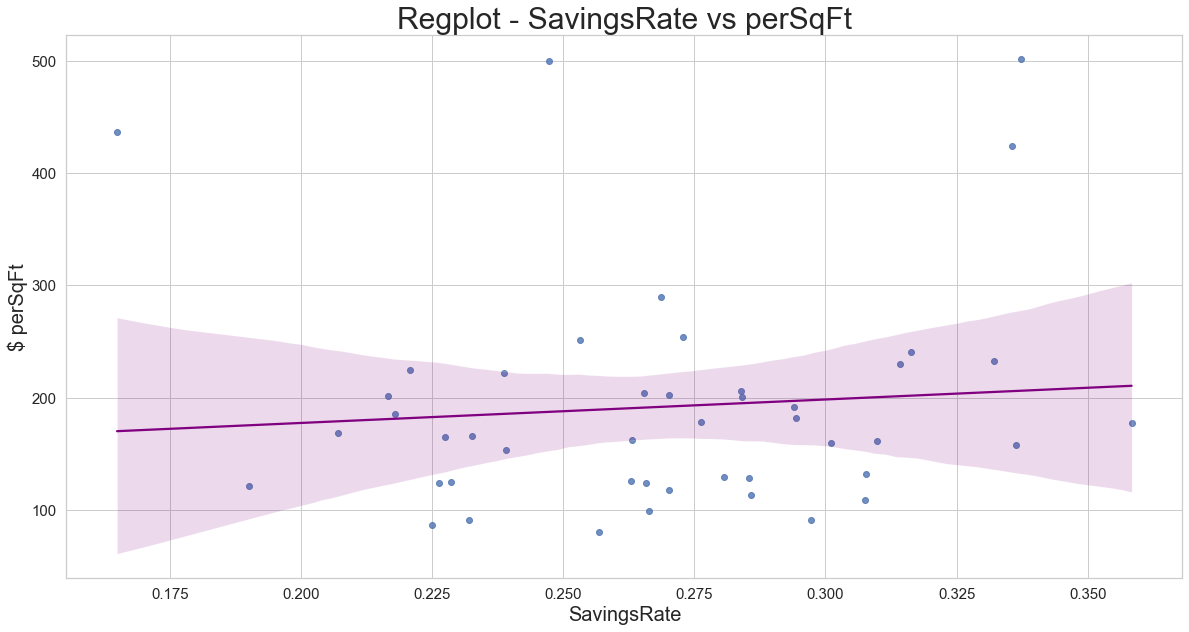

In [83]:
# Regression plot of SavingsRate vs perSqFt
plt.figure(figsize=(20,10))
g = sns.regplot(data = state_df, y = 'perSqFt', x = 'SavingsRate', line_kws={'color':'purple'})
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
# The States that have higher SavingRate will pay higher perSqFt for the houses. Note: perSqFt vs House price is two different things.

# Annotation
plt.xlabel('SavingsRate', fontsize=20)
plt.ylabel('$ perSqFt', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Regplot - SavingsRate vs perSqFt', fontsize=30)

- There is slight correlation between SavingsRate and perSqFt. <br>
- As people saves more money, they pay higher perSqFt for the house.<br>
Note: This doesnt mean they will be better furnished houses, it may be geographic area. We dont have enough data/evidence to prove this.

Text(0.5, 1.0, 'Regplot - GDP vs Price')

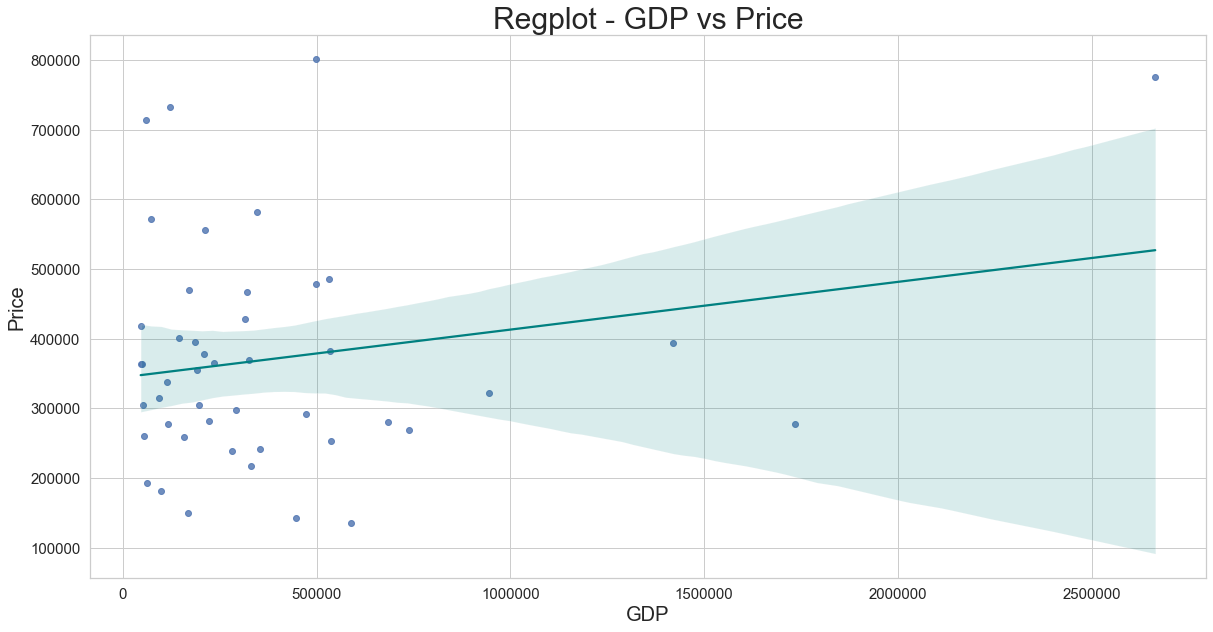

In [84]:
# Regplot for GDP vs Price
plt.figure(figsize=(20,10))
g = sns.regplot(data = state_df, x = 'GDP', y = 'Price', line_kws={'color':'teal'})
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
# g.set(xlim = (0,1000000))

# Annotation
plt.xlabel('GDP', fontsize=20)
plt.ylabel('Price', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Regplot - GDP vs Price', fontsize=30)

- There is slight correlation between GDP and House Price.

Text(0.5, 1.0, 'Barplot - State vs Years of Saving')

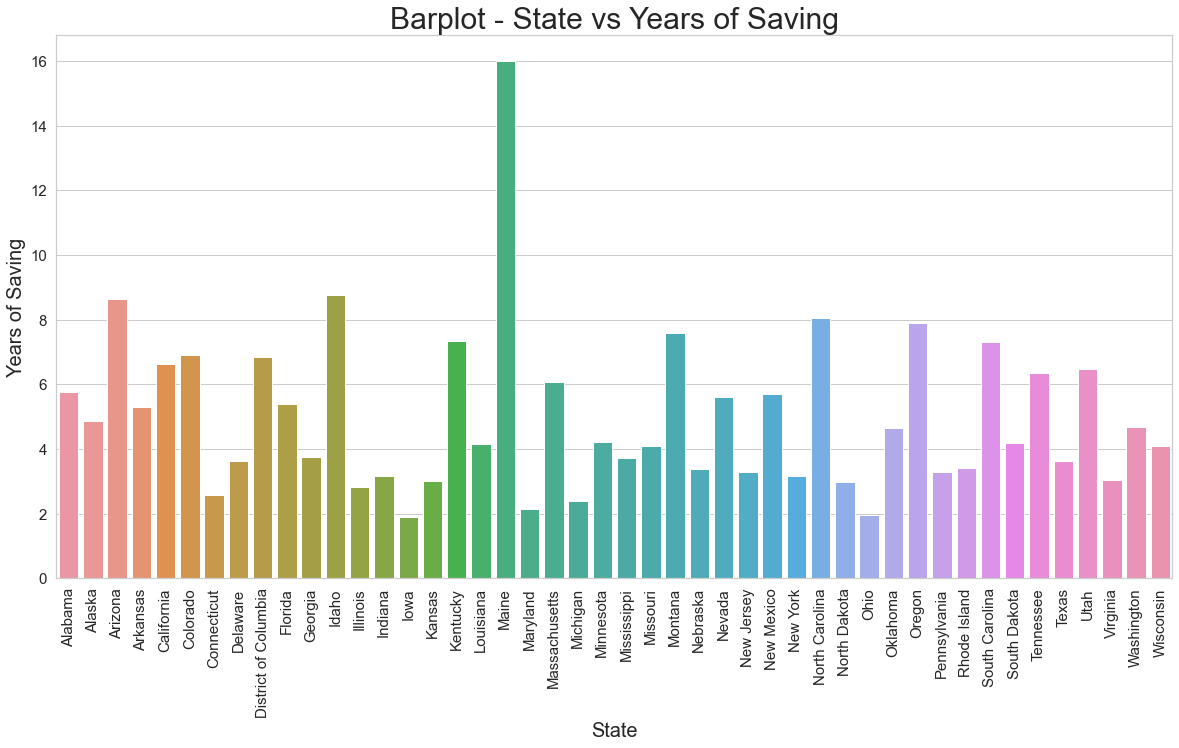

In [85]:
# Barplot
plt.figure(figsize=(20,10))

# sorted_df = state_df.sort_values(by='Years_of_Savings',ascending=True)
sns.barplot(data=state_df,x='fullState',y='Years_of_Savings')

# Annotation
plt.xlabel('State', fontsize=20)
plt.ylabel('Years of Saving', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.title('Barplot - State vs Years of Saving', fontsize=30)

# value_array = state_df['Years_of_Savings'].to_list()
# for i in range(len(value_array)):
#     plt.text(x=state_df['fullState'][i],y=state_df["Years_of_Savings"][i]+0.1, s=state_df["fullState"][i], fontdict=dict(color='black', size=12), bbox=dict(facecolor='grey', alpha=0.3))

- Number of years to save in order to purchase a house with 20% down payment.

In [86]:
state_df.head()

fullState        GDP   Spending  Population     Income Region State  \
0     Alabama  196906.10  176479.80     4934193  228748.80  South    AL   
1      Alaska   50161.00   35635.70      724357   46430.30   West    AK   
2     Arizona  320550.60  287090.10     7520103  368458.60   West    AZ   
3    Arkansas  114943.50  104488.80     3033946  143147.90  South    AR   
4  California 2663665.90 1835980.60    39613493 2763312.00   West    CA   

   Bathrooms  Bedrooms     Price    Size  perSqFt  HouseCount  SavingsRate  \
0       2.62      3.38 305048.89 2319.30   124.37         892         0.23   
1       2.97      4.59 363202.40 2392.84   165.54         403         0.23   
2       2.51      3.34 466962.46 2070.79   224.66        1998         0.22   
3       2.96      3.64 337014.73 2804.81   117.71         280         0.27   
4       2.56      3.44 776273.37 1965.24   424.09        5696         0.34   

   Years_of_Savings  perAnnualIncome  
0              5.76         46359.92  
1              4.87         64098.64  
2              8.63         48996.48  
3              5.29         47182.09  
4              6.63         69756.84

Text(0.5, 1.0, 'Lineplot - Size vs Price, Hue is Region')

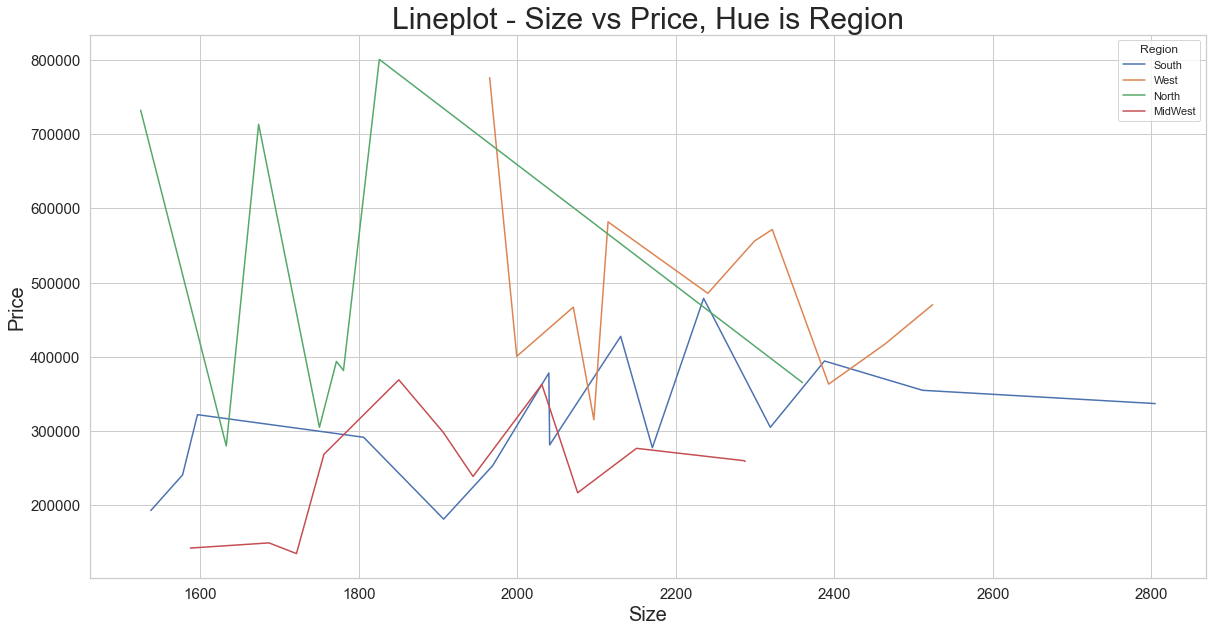

In [87]:
# Lineplot Size vs Price
plt.figure(figsize=(20,10))
sns.lineplot(x="Size", y='Price', hue='Region', data=state_df)

# Annotation
plt.xlabel('Size', fontsize=20)
plt.ylabel('Price', fontsize = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Lineplot - Size vs Price, Hue is Region', fontsize=30)

- Blue - South Region is kind of positive correlated, but Price does not exceed $500k and have all kinds of Sizes
- Orange - West Region has higher prices and larger Sizes
- Green - North Region has high prices in smaller Sizes
- Red - MidWest has low prices and smaller Sizes 

Text(0.5, 1.0, 'Swarmplot - Region vs Years_of_Savings')

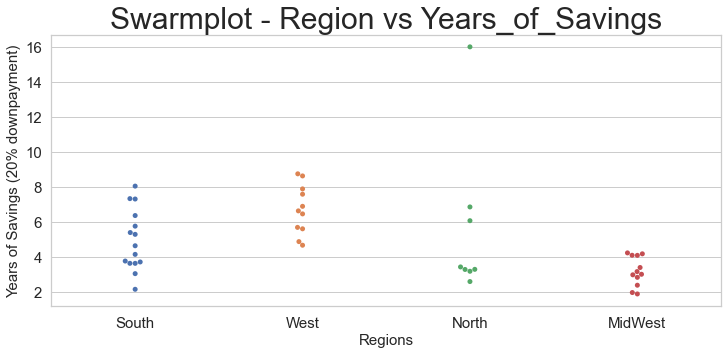

In [88]:
plt.figure(figsize=(12,5))
sns.swarmplot(x='Region',y='Years_of_Savings',data=state_df)
# sns.violinplot(data=state_df['Years_of_Savings'],orient='horizontal',palette='Set2')


# Annotation
plt.xlabel('Regions', fontsize=15)
plt.ylabel('Years of Savings (20% downpayment)', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Swarmplot - Region vs Years_of_Savings', fontsize=30)


- South Region is around 3 to 8 Years of Saving
- West Region have higher 4.5 to 9 Years of Saving
- North Region have outliers, but most are almost near 4 Years of Saving
- MidWest Region have overall lowest, and are around 1-4 Years of Saving

<Figure size 1440x720 with 0 Axes>

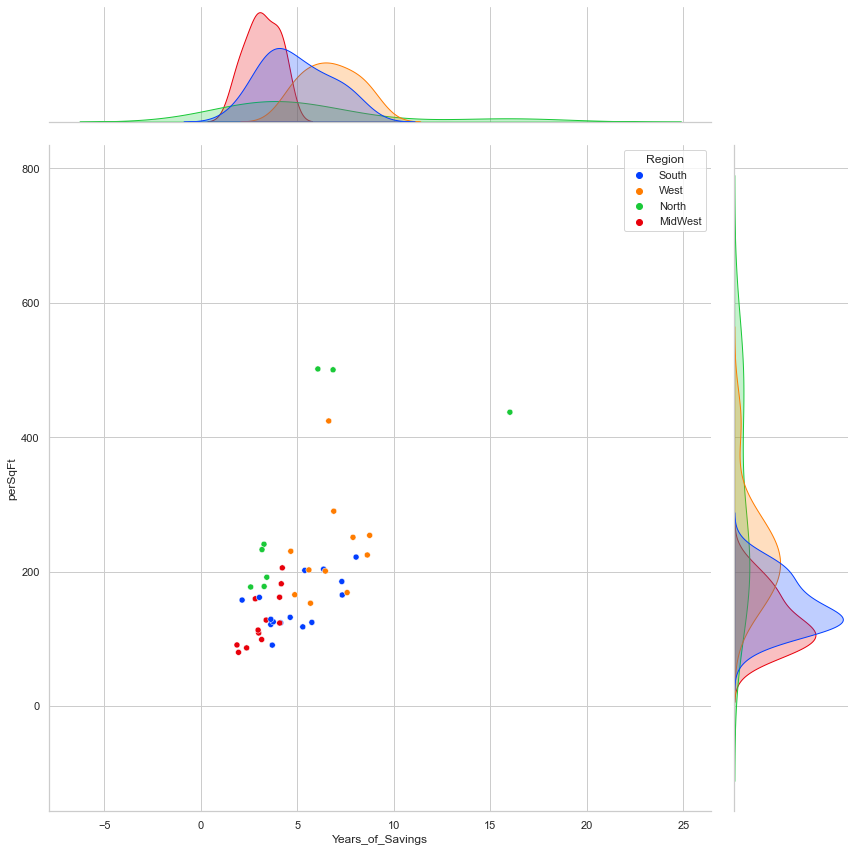

In [89]:
# sns.jointplot(data=state_df,x='Years_of_Savings',y='Price',size='Population')
plt.figure(figsize=(20,10))
sns.jointplot(data=state_df,y='perSqFt',x='Years_of_Savings', hue='Region', palette='bright',height=12)

Year of Savings are mostly around 5 years. <br>
Price is around 200k to 600k.<br>
West has higher price range around 600k to 800k <br>

Preview the distribution of data and where they lie mostly.

In [112]:
# Choropleth graph
data = dict(type = 'choropleth',colorscale='Portland',locations=state_df['State'],locationmode='USA-states', z=state_df['Price'],text=state_df['Price'], colorbar={'title':'Price'})
choromap = go.Figure(data = [data],layout = dict(geo = {'scope':'usa'},title_text='<b>House Price of each State</b><br>(Hover for Avg Price)'))

iplot(choromap,validate=False)


CA, MA have highest housing price across the United States. Additionally most western regions are pretty high. 

In [91]:
# Choropleth graph
data = dict(type = 'choropleth',colorscale='Portland',locations=state_df['State'],locationmode='USA-states', z=state_df['perSqFt'],text=state_df['perSqFt'], colorbar={'title':'perSqFt'})
choromap = go.Figure(data = [data],layout = dict(geo = {'scope':'usa'},title_text='<b>perSqFt of each State</b><br>(Hover for Avg perSqFt)'))

iplot(choromap,validate=False)


From a $ perSqFt point of view, the nation is actually pretty similar. Besides MA, ME, CA, and CO.

In [92]:
# Choropleth graph
data = dict(type = 'choropleth',colorscale='Portland',locations=state_df['State'],locationmode='USA-states', z=state_df['SavingsRate'],text=state_df['SavingsRate'], colorbar={'title':'SavingsRate'})
choromap = go.Figure(data = [data],layout = dict(geo = {'scope':'usa'},title_text='<b>SavingsRate of each State</b><br>(Hover for Avg SavingsRate)'))

iplot(choromap,validate=False)


The whole country's SavingsRate is relatively similar, in the range of 25 to 35 %.

In [93]:
# Choropleth graph
data = dict(type = 'choropleth',colorscale='Portland',locations=state_df['State'],locationmode='USA-states', z=state_df['Years_of_Savings'],text=state_df['Years_of_Savings'], colorbar={'title':'Years_of_Savings'})
choromap = go.Figure(data = [data],layout = dict(geo = {'scope':'usa'},title_text='<b>Years_of_Savings of each State</b><br>(Hover for Years_of_Savings)'))

iplot(choromap,validate=False)

In [94]:
# Choropleth graph
data = dict(type = 'choropleth',colorscale='Portland',locations=state_df['State'],locationmode='USA-states', z=state_df['perAnnualIncome'],text=state_df['perAnnualIncome'], colorbar={'title':'perAnnualIncome'})
choromap = go.Figure(data = [data],layout = dict(geo = {'scope':'usa'},title_text='<b>Avg Individual\'s Annual Income of each State</b><br>(Hover for per Annual Income)'))

iplot(choromap,validate=False)


- West Region are mostly brighter/higher than other regions.

### 4. Testing Hypothesis, ANOVA

#### Importing Libraries

In [95]:
# Importing Libraries
from scipy.stats import normaltest
from statsmodels.stats.weightstats import ztest
import scipy.stats as stats
from scipy.stats import chi2_contingency

#### Pearson Coefficient vs P-Value

In [96]:
# Calculate pearson coefficient and pvalue
pearson_coef, p_value = stats.pearsonr(house_df['Bathrooms'], house_df['Price'])

# print out results
print(f'The Pearson Correlation Coefficient is {pearson_coef:.4f} with a P-value of {p_value:.4f}')
if p_value < 0.001:
    print('Since p-value is < 0.001, the correlation between Bathrooms and Price is statistically significant, although the linear relationship isn\'t extreamely strong.')
else:
    print('Since p-value is > 0.001, the correlation between Bathrooms and Price is not statistically significant.')


The Pearson Correlation Coefficient is 0.4857 with a P-value of 0.0000
Since p-value is < 0.001, the correlation between Bathrooms and Price is statistically significant, although the linear relationship isn't extreamely strong.


#### Z-Test Hypothesis


H<sub>0</sub> : u <= u<sub>0</sub><br>
California house prices is higher than 600k

<br><br>
H<sub>1</sub> : u > u<sub>0</sub><br>
California house prices is lower than 600k



In [97]:

# Calculate test statistic and pvalue
(test_statistic, p_value) = ztest(house_df[house_df['State'] == 'CA']['Price'], value=600000, alternative='smaller',ddof=1)

# print out results
print(f'The Test Statistic is {test_statistic:.4f} with a P-value of {p_value:.4f}')
if p_value < 0.005:
    print('Since p-value is < 0.005, we do not retain the null hypothesis.')
else:
    print('Since p-value is > 0.005, we retain the null hypothesis')


The Test Statistic is 30.5485 with a P-value of 1.0000
Since p-value is > 0.005, we retain the null hypothesis


#### ANOVA

In [98]:
anova_df = house_df[['Region', 'Price']]
groupby_anova = anova_df.groupby(['Region'])
F_oneway, p_value = stats.f_oneway(groupby_anova.get_group('West')['Price'], groupby_anova.get_group('MidWest')['Price'])
print('ANOVA results: F-Oneway = {:.4f}, P-Value = {:.4f}.'.format(F_oneway,p_value))

F_oneway, p_value = stats.f_oneway(groupby_anova.get_group('North')['Price'], groupby_anova.get_group('MidWest')['Price'])
print('ANOVA results: F-Oneway = {:.4f}, P-Value = {:.4f}.'.format(F_oneway,p_value))

F_oneway, p_value = stats.f_oneway(groupby_anova.get_group('South')['Price'], groupby_anova.get_group('North')['Price'])
print('ANOVA results: F-Oneway = {:.4f}, P-Value = {:.4f}.'.format(F_oneway,p_value))


F_oneway, p_value = stats.f_oneway(groupby_anova.get_group('South')['Price'], groupby_anova.get_group('West')['Price'])
print('ANOVA results: F-Oneway = {:.4f}, P-Value = {:.4f}.'.format(F_oneway,p_value))

F_oneway, p_value = stats.f_oneway(groupby_anova.get_group('West')['Price'], groupby_anova.get_group('North')['Price'])
print('ANOVA results: F-Oneway = {:.4f}, P-Value = {:.4f}.'.format(F_oneway,p_value))

ANOVA results: F-Oneway = 6028.2917, P-Value = 0.0000.
ANOVA results: F-Oneway = 2060.2618, P-Value = 0.0000.
ANOVA results: F-Oneway = 1265.6909, P-Value = 0.0000.
ANOVA results: F-Oneway = 7083.4905, P-Value = 0.0000.
ANOVA results: F-Oneway = 623.1008, P-Value = 0.0000.


As you can see all P-Value < 0.05, all region house prices are significantly different. Strong correlation between region variable and price.

#### Chi-Squared Test

In [99]:
# See if Savings Rate and Bedrooms are dependent
chi2_df = state_df[['SavingsRate', 'Bedrooms']]
stat, p, dof,expected = chi2_contingency(chi2_df)

# H0 = SavingsRate and Bedrooms are independent
# Ha = SavingsRate and Bedrooms are dependent

# print out results
print(f'The Test Statistic is {stat:.4f} with a P-value of {p:.4f}')
if p_value < 0.05:
    print('Since p-value is < 0.05, they are dependent.') # We Reject H0, statistically significant
else:
    print('Since p-value is > 0.05, they are independent')


The Test Statistic is 0.2829 with a P-value of 1.0000
Since p-value is < 0.05, they are dependent.


### 5. Conclusion

<b> Questions </b>
<ol>
<li>What is average and median house price across all USA?</li>
- Median are: 3 Bedrooms, 2 Bathrooms, 1702 SqFt, Price of 325,000<br>
- Average are: 3.3 Bedrooms, 2.5 Bathrooms, 2000 SqFt, Price of 407,000
<br><br>
<li>Is Size highly correlated with Price? If not what’s most correlated with Price.</li>
- Size and Price correlation is 48%
- Highest correlation is Bathroom, 49%
<br><br>
<li>What's the primary type of houses people prefer in each state? (Graph answer, house_df graph)</li>
- Primary Type is Single Family Residence <br>
Massachusetts, Alaska, District of Columbia are primarily Condos. <br>
Maryland, Pennylvania, Delaware are primarily Townhouses or have huge % in Townhouses.
<br><br>
<li>What states have the largest and smallest avg size? </li>
- States with Largest House Size<br>
State AR have average of 2805 square feet.<br>
State UT have average of 2524 square feet.<br>
State OK have average of 2511 square feet.<br>
- States with Smallest House Size<br>
State DC have average of 1525 square feet.<br>
State DE have average of 1538 square feet.<br>
State MD have average of 1578 square feet.
<br><br>
<li>What states have the highest and lowest $ perSqFt?</li>
- Highest States $ perSqFt<br>
State MA have average of $501.47 per square feet<br>
State DC have average of $500.22 per square feet<br>
State ME have average of $437.12 per square feet<br>
- Lowest  States $ perSqFt<br>
State OH have average of $79.80 per square feet<br>
State MI have average of $86.42 per square feet<br>
State MS have average of $90.56 per square feet
<br><br>
<li>Find out the SavingsRate for each state.</li>
- See choropleth map
<br><br>
<li>Save how many years to buy a house with 20% down payment per state.</li>
- See choropleth map
</ol>

<b> Other Interesting Findings </b>
<ul>
<li>With higher $ perSqFt, Size will be smaller, seems negatively correlated.</li>
<li>The West Region has higher real estate prices. </li>
<li>In AZ, there are a lot more house activities per person than other states.</li>
<li>The $ perSqFt and Savings rate are positively correlated. So people who save more will spend more money on $ perSqFt in houses.</li>
<li>Country’s savings rate is mostly 25-35%, since i know how much is in your wallet/savings, i can calculate what kind/price-range of items are appropriate for you to spend on. (good to target ad)</li>
<li>Colorado has a high $ perSqFt compared to average. From another student’s project, it indicated that CO has a higher education level. (So it match the findings)</li>
<li>Maine has high house Price vs Income difference.</li>
<li>For some states, you only need work 2-4 years to buy a house. Ex: Iowa</li>



<li>Data can be used for many other exploratories</li>
</ul>


### 6. References

Data of:    Housing Price Data<br>
https://www.kaggle.com/dataranch/zillow-1
<br><br>
Data of:    Population<br>
https://worldpopulationreview.com/states
<br><br>
Data of:    1-GDP, 2-Income, 3-Spending <br>
https://apps.bea.gov/iTable/iTable.cfm?reqid=70&step=1&isuri=1&acrdn=1#reqid=70&step=1&isuri=1&acrdn=1